<a href="https://colab.research.google.com/github/kostas696/My_Latest_Projects/blob/main/Customer_Segmentation_and_Market_Basket_Analysis_for_UK_Retail_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Customer Segmentation and Market Basket Analysis for UK Retail Data**

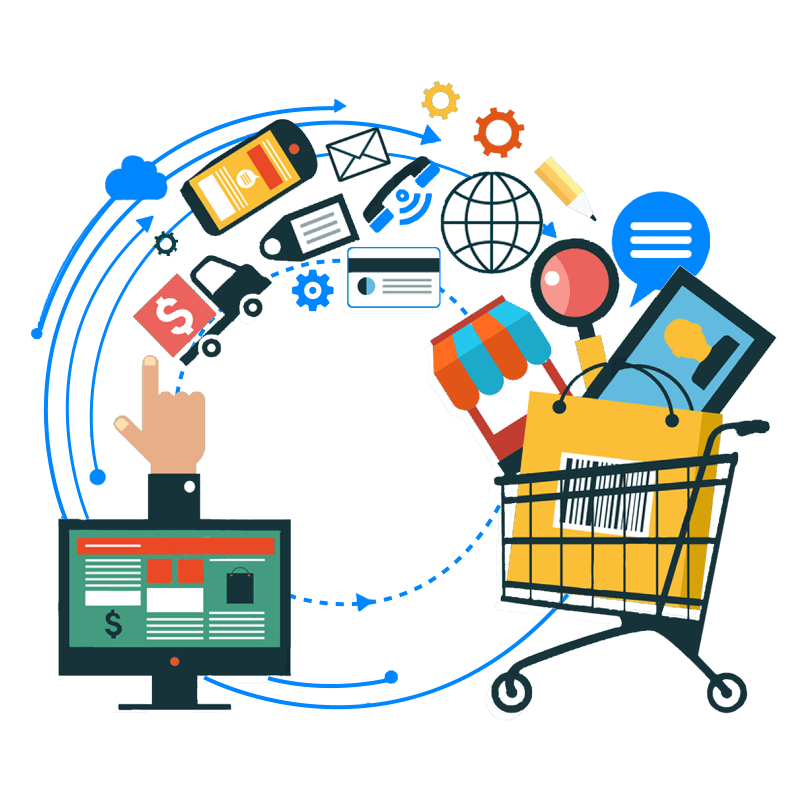

# Introduction

In today’s competitive retail environment, understanding customer behavior is critical for devising effective marketing strategies. With the explosion of e-commerce, companies now have access to vast amounts of data that can provide insights into customer purchasing patterns. This project aims to analyze transactional data from a UK-based online retailer, focusing on customer segmentation and market basket analysis. By exploring customer behavior and identifying product associations, the project seeks to help businesses make data-driven decisions that can enhance customer satisfaction and optimize sales.

# Objective

The primary objective of this project is to segment customers based on their purchasing behavior and to identify associations between products that are frequently purchased together. Specifically, the project aims to:

- Segment Customers: Using Recency, Frequency, Monetary, and Interpurchase Time (RFMT) metrics to classify customers into distinct segments.
- Perform Cohort Analysis: Examine customer retention and sales trends over time to identify patterns in customer behavior.
- Conduct Market Basket Analysis: Identify frequently co-purchased products using the Apriori algorithm and analyze the strength of the associations between these products.
- Visualize Insights: Provide clear visualizations to communicate findings, including sales trends, customer segments, and product associations.

# Dataset Information

The dataset used in this project is a transnational data set containing all transactions between December 1, 2010, and December 9, 2011, for a UK-based and registered non-store online retailer. The company specializes in unique all-occasion gifts and has a customer base that includes many wholesalers. The dataset contains 541,909 instances and 8 attributes, which are both numeric and categorical. The key attributes include:

- **InvoiceNo**: Unique identifier for each transaction.
- **StockCode**: Unique product code.
- **Description**: Name of the product.
- **Quantity**: Number of units purchased per transaction.
- **InvoiceDate**: Date and time of the transaction.
- **UnitPrice**: Price per unit of the product.
- **CustomerID**: Unique identifier for each customer.
- **Country**: Country where the customer resides.

# Research Questions

1. How can customers be segmented based on their purchasing behavior, and what are the characteristics of each segment?
2. What patterns and trends exist in customer retention and sales over time?
3. Which products are frequently purchased together, and what are the strongest associations between them?
4. How can the identified customer segments and product associations be used to enhance marketing strategies and sales performance?

# Approach of Analysis

To achieve the objectives, the project follows a structured approach:

- **Data Cleaning and Preprocessing**: Handle missing values, remove duplicates, and filter the dataset to focus on UK transactions. Outliers are identified and removed to improve analysis accuracy.
- **Exploratory Data Analysis (EDA)**: Analyze sales trends, customer behavior, and product performance over time using visualizations such as line plots, bar charts, and box plots.
- **Cohort Analysis**: Perform cohort analysis to examine customer retention and sales trends over time, with a focus on different customer groups and product categories.
- **RFMT Modeling and Segmentation**: Calculate Recency, Frequency, Monetary, and Interpurchase Time (RFMT) metrics for each customer and segment them into distinct groups based on their behavior.
- **Clustering**: Apply K-Means clustering to the RFMT data to identify customer segments. Evaluate the clusters using inertia and silhouette scores and visualize them using PCA.
- **Market Basket Analysis**: Implement the Apriori algorithm to identify frequent itemsets and generate association rules. Visualize the rules using heatmaps, parallel coordinates, and network graphs to explore product relationships.
- **Interpretation and Recommendations**: Provide actionable insights based on the analysis, with recommendations for improving customer engagement and optimizing product offerings.
This structured approach will lead to a comprehensive understanding of customer behavior and product associations, enabling the retailer to make informed decisions that drive growth and customer satisfaction.

## Imports

In [ ]:
# Upgrade and install ydata-profiling with notebook support
!pip install -U ydata-profiling
!pip install -U ydata-profiling[notebook]

# Install data visualization libraries
!pip install -q sweetviz
!pip install -q opendatasets

# Upgrade the Pillow library
!pip install --upgrade Pillow

In [ ]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
import datetime as dt

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import sweetviz as sv
from pandas_profiling import ProfileReport
import ydata_profiling
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# Data Handling and Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clustering and Evaluation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

# Frequent Pattern Mining
from mlxtend.frequent_patterns import apriori, association_rules

# External Datasets
import opendatasets as od

# Plotting Configuration
sns.set(rc={'figure.figsize':(16, 8)})
sns.set_style("darkgrid")

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import our dataset from kaggle
od.download('https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kostas696
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo


100%|██████████| 21.8M/21.8M [00:00<00:00, 103MB/s] 


## Load Dataset

In [ ]:
# Load the dataset
retail_data = pd.read_excel("/content/online-retail-data-set-from-uci-ml-repo/Online Retail.xlsx")

In [ ]:
# Display first few rows
retail_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

## Dataset Overview

In [ ]:
# Dataset overview
print ("Rows     : " , retail_data.shape[0])
print ("Columns  : " , retail_data.shape[1])
print ("\nFeatures : \n" , retail_data.columns.tolist())
print ("\nMissing values :  ", retail_data.isnull().sum().values.sum())
print ("\nUnique values :  \n", retail_data.nunique())
print ("\nDuplicate values : ", retail_data.duplicated().sum())

Rows     :  541909
Columns  :  8

Features : 
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Missing values :   136534

Unique values :  
 InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Duplicate values :  5268


- Missing Values: There are 136,534 missing values, primarily in the CustomerID column.
- Duplicate Values: The dataset contains 5,268 duplicate records.
- Unique Entries: The dataset includes 4,070 unique products (StockCode), 4,223 unique product descriptions, 4,372 unique customers (CustomerID), and 38 countries.

**Actions:**
- We will handle the missing values, especially in the CustomerID column, as this is crucial for accurate customer analysis.
- We will remove the 5,268 duplicate records to ensure the data integrity before proceeding with further analysis.

In [ ]:
# Dataset information
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Data Cleaning

### Handling Missing Values, Duplicates, and Outliers

In [ ]:
# Remove rows with missing CustomerID
retail_data = retail_data.dropna(subset=['CustomerID'])

# Remove negative Quantity and UnitPrice
retail_data = retail_data[(retail_data['Quantity'] > 0) & (retail_data['UnitPrice'] > 0)]

# Remove duplicates
retail_data = retail_data.drop_duplicates()

In [ ]:
# Convert the StockCode and CustomerID columns to strings
retail_data['StockCode'] = retail_data['StockCode'].astype(str)
retail_data['CustomerID'] = retail_data['CustomerID'].astype(float).astype(int).astype(str)

# Verify the conversion
print(retail_data['StockCode'].dtypes)
print(retail_data['CustomerID'].dtypes)

object
object


In [ ]:
# Summary statistics
retail_data.describe()

Quantity                    InvoiceDate      UnitPrice
count  392692.000000                         392692  392692.000000
mean       13.119702  2011-07-10 19:13:07.771892480       3.125914
min         1.000000            2010-12-01 08:26:00       0.001000
25%         2.000000            2011-04-07 11:12:00       1.250000
50%         6.000000            2011-07-31 12:02:00       1.950000
75%        12.000000            2011-10-20 12:53:00       3.750000
max     80995.000000            2011-12-09 12:50:00    8142.750000
std       180.492832                            NaN      22.241836

**Quantity:**

- Count: 392,692 entries.
- Mean: 13.12 units per transaction.
- Min-Max: Ranges from 1 to 80,995 units.
- Standard Deviation: 180.49, indicating a wide variation in the number of units sold per transaction.

**InvoiceDate:**

- The dataset spans from December 1, 2010, to December 9, 2011.
- Median Date: July 31, 2011, suggesting a relatively even distribution of transactions over time.

**UnitPrice:**

- Mean: £3.13 per unit.
- Min-Max: Prices range from £0.001 to £8,142.75, indicating a significant price range.
- Standard Deviation: 22.24, reflecting a wide disparity in product prices.

**Actions:**

- We will explore the extreme values in Quantity and UnitPrice to determine if they are legitimate or outliers that need to be addressed.
- We will analyze the distribution of these variables further to identify patterns, trends, and potential anomalies that could impact the analysis.

In [ ]:
profile = ProfileReport(retail_data, title="Profiling Report")
profile.to_file("retail_data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
my_report = sv.analyze(retail_data)
my_report.show_html('retail_data.html')

                                             |          | [  0%]   00:00 -> (? left)

Report retail_data.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



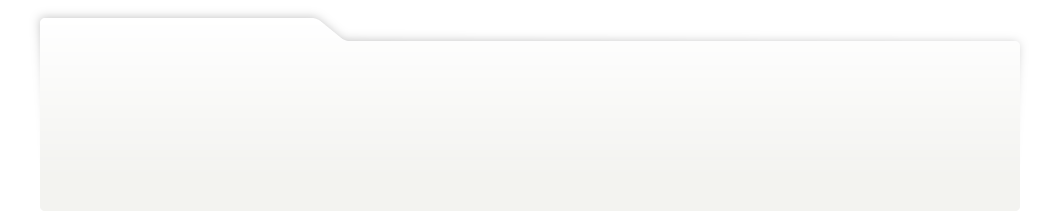
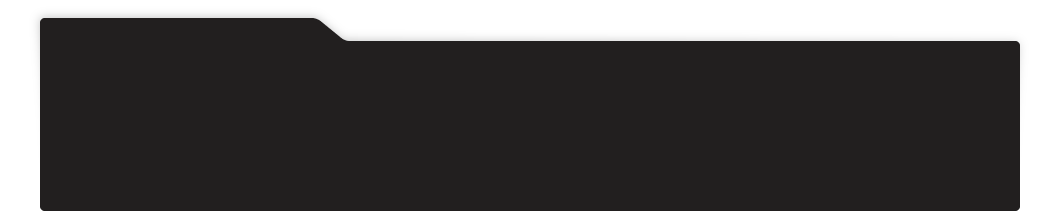
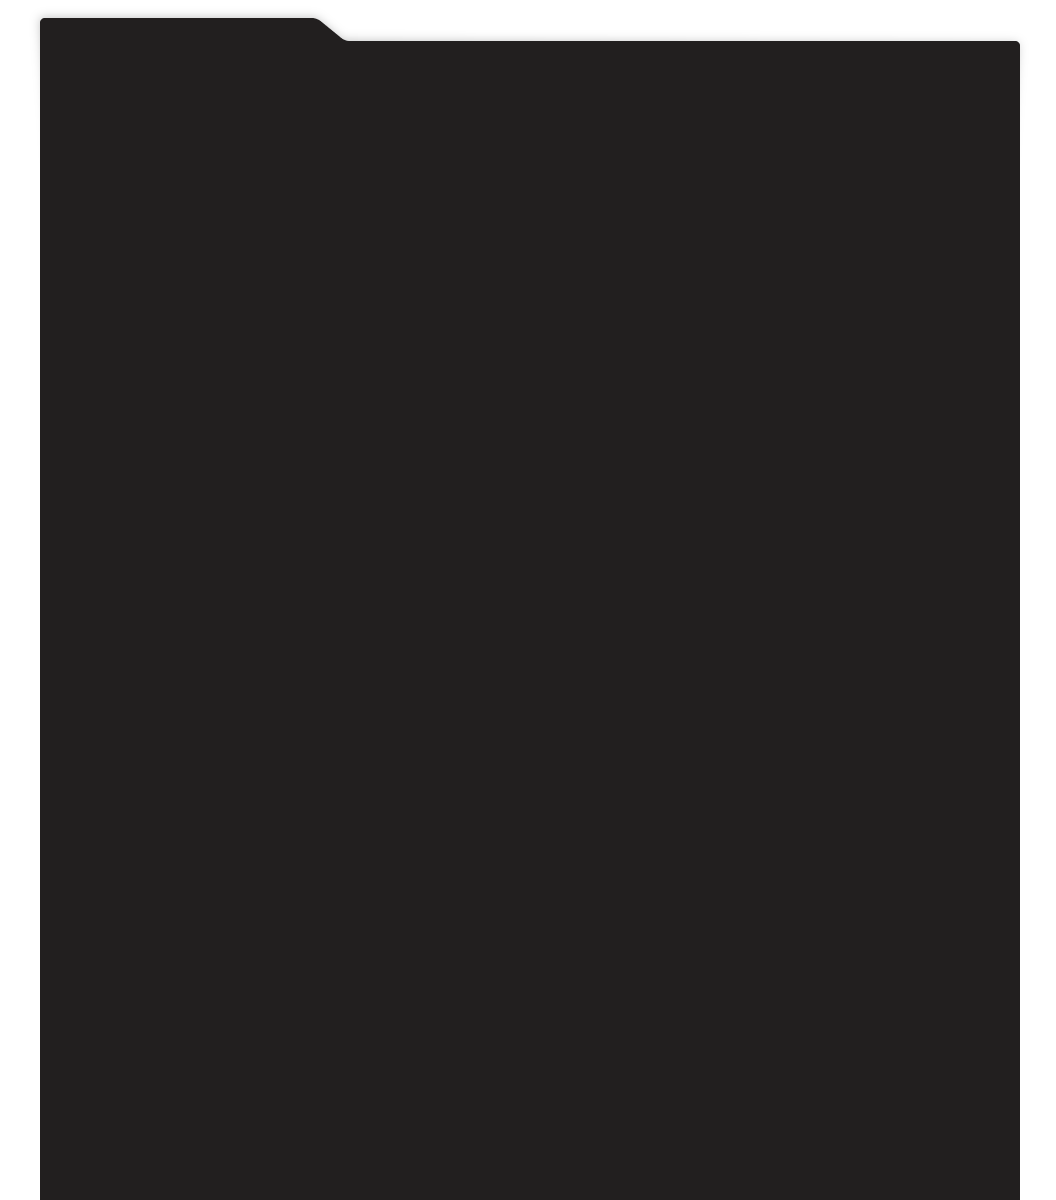
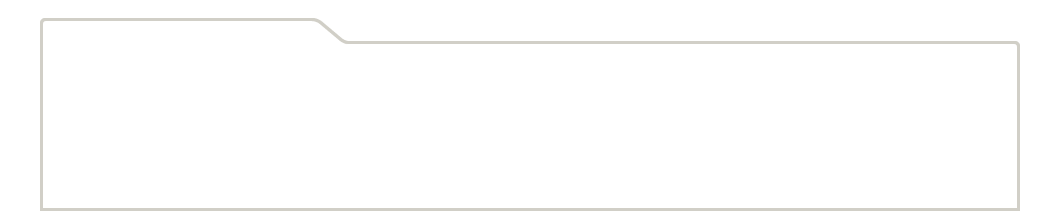
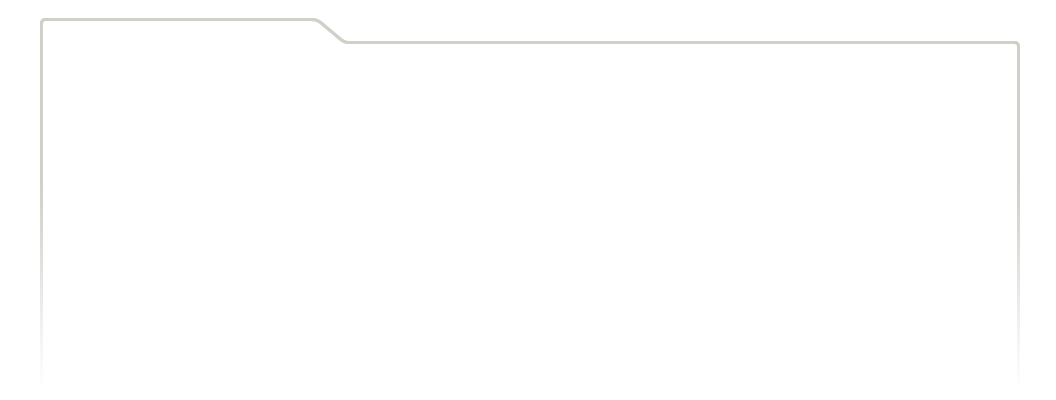
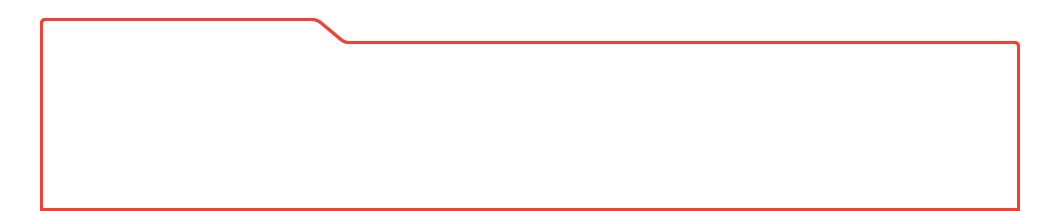
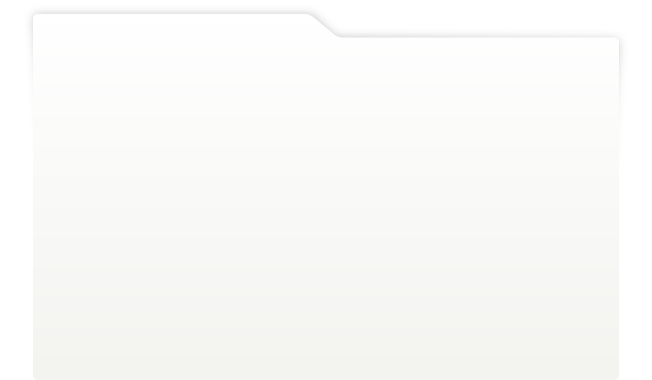
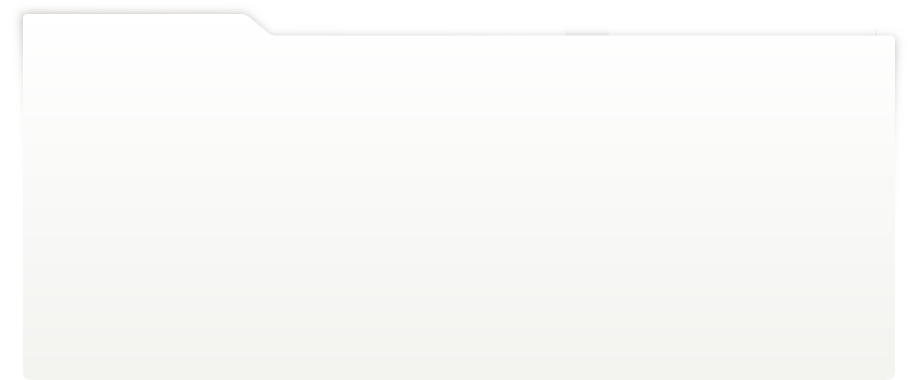
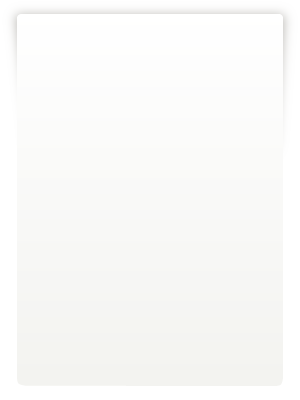
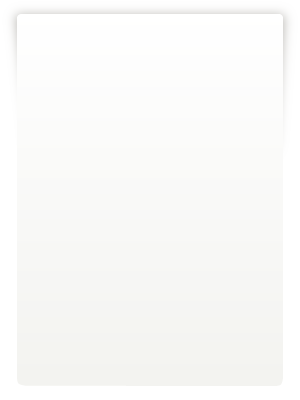
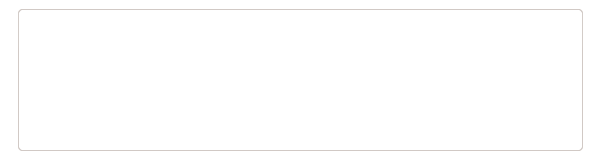
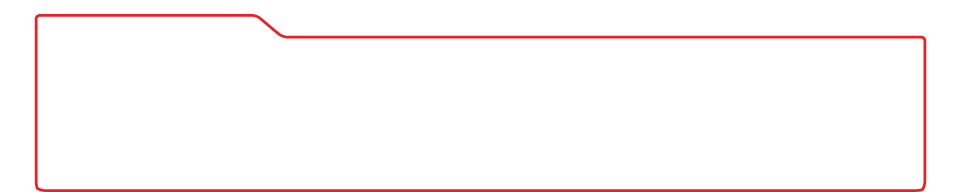
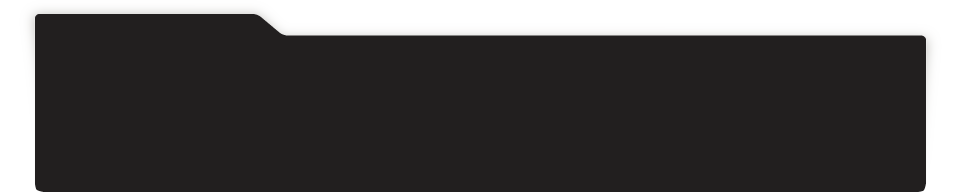
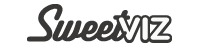
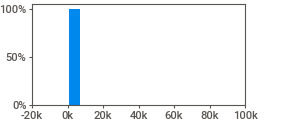
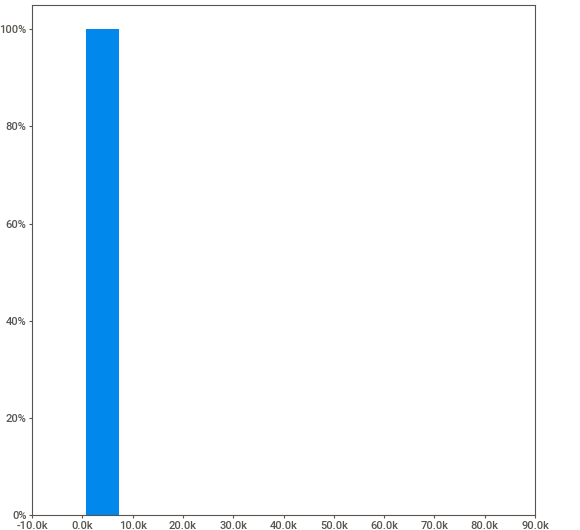
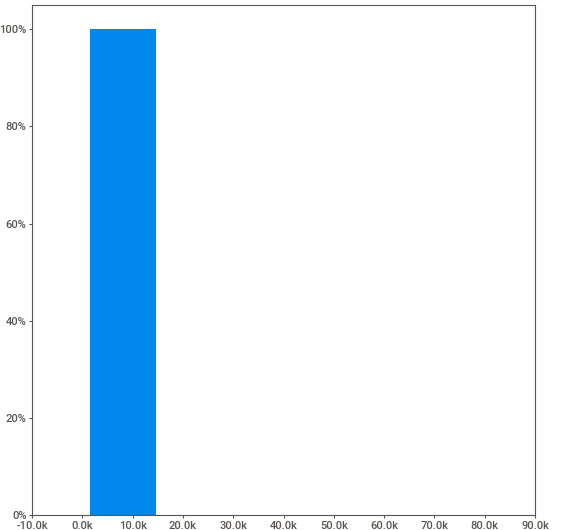
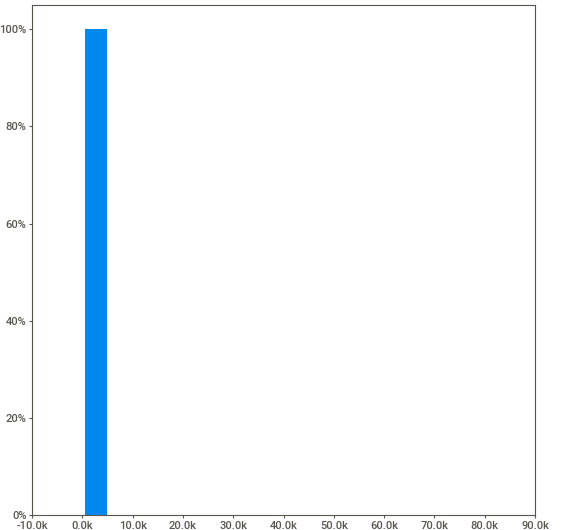
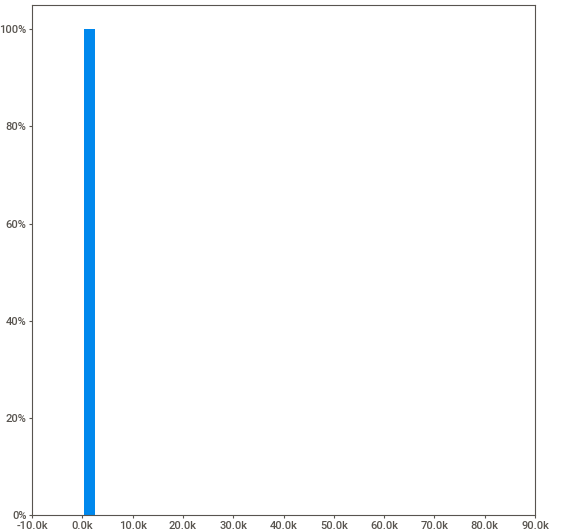
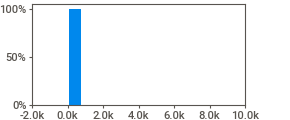
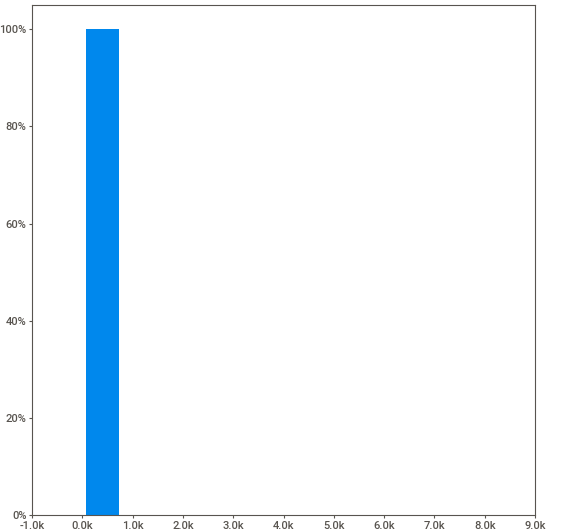
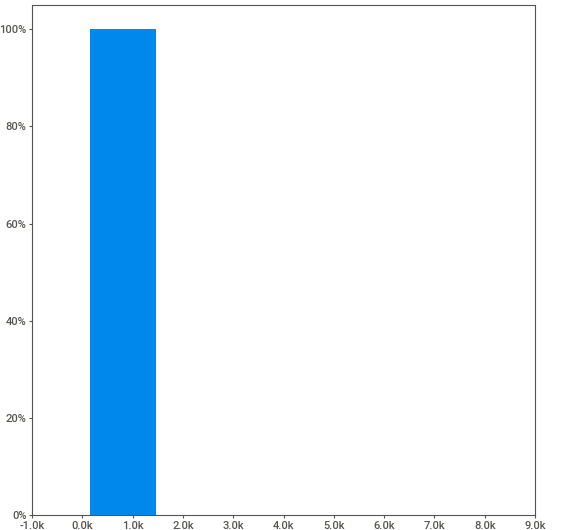
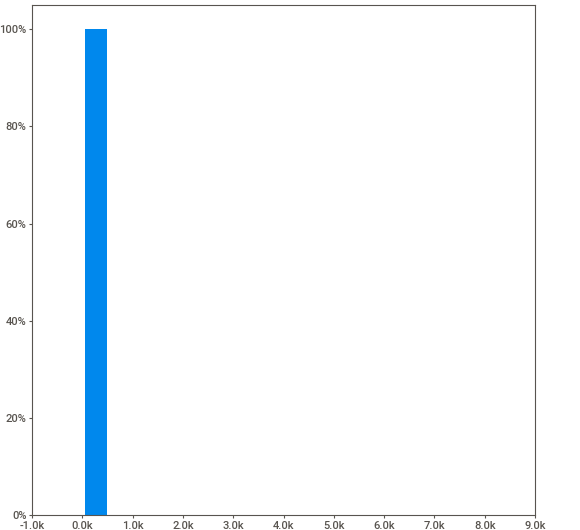
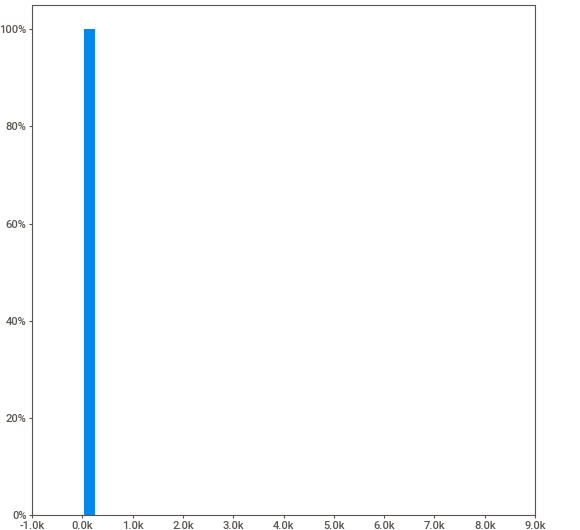
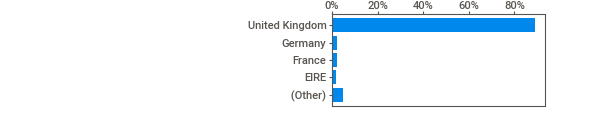
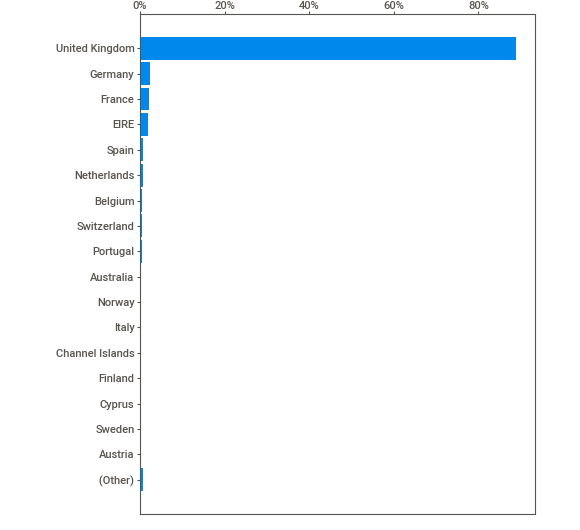
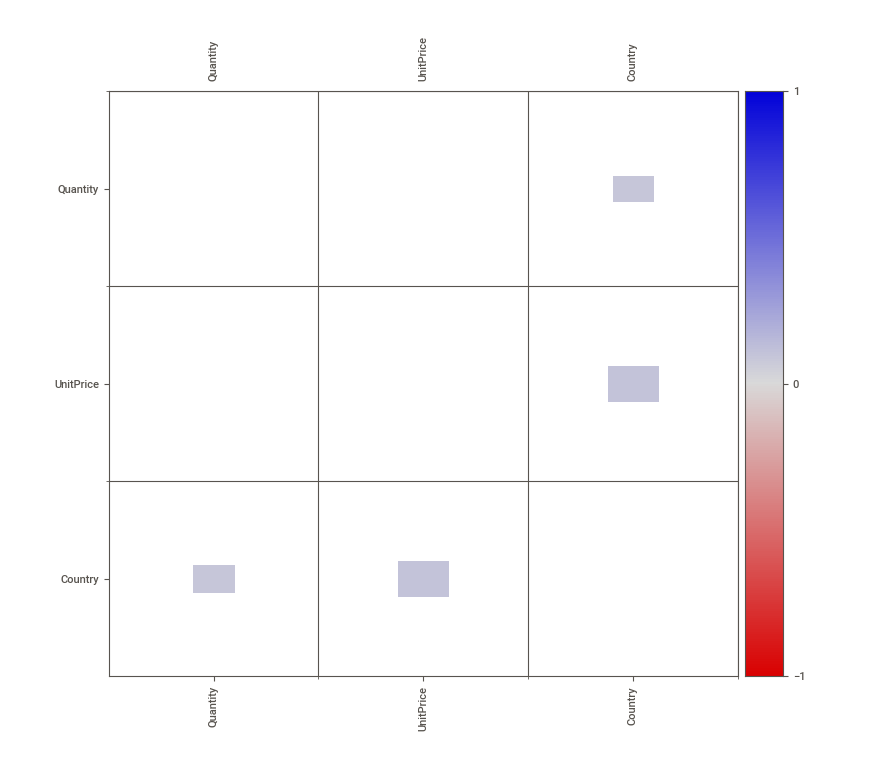
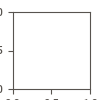

In [ ]:
my_report.show_notebook(w=None,
                h=None,
                scale=None,
                layout='widescreen',
                filepath=None)

In [ ]:
# Check the frequency of values in Country
retail_data.Country.value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuania                   35
Brazil                      32
Czech Republic              25
Bahrain                     17
Saudi Arabia                 9
Name: count, dtype: int64

In [ ]:
# Filter the data to keep only entries for the United Kingdom
uk_data = retail_data[retail_data['Country'] == 'United Kingdom']

# Verify the filtering
print("Rows in UK dataset:", uk_data.shape[0])

Rows in UK dataset: 349203


## Outlier Detection and Removal

In [ ]:
# Selecting only numerical columns
numerical_columns = uk_data.select_dtypes(include=[np.number])

# Calculating the Interquartile Range (IQR) for each numerical column
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Defining the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding outliers by checking if values fall outside the bounds
outliers = (numerical_columns < lower_bound) | (numerical_columns > upper_bound)

# Printing outliers for each numerical column
for column in outliers.columns:
    print(f"Outliers in {column}:")
    print(uk_data[outliers[column]][column])
    print()

Outliers in Quantity:
9         32
46        80
65        32
82        48
83        64
          ..
541835    40
541865    40
541866    36
541867    72
541868    48
Name: Quantity, Length: 20218, dtype: int64

Outliers in UnitPrice:
5         7.65
16        9.95
19        7.95
20        7.95
63        7.65
          ... 
541752    8.50
541753    8.50
541831    8.50
541849    9.95
541892    8.95
Name: UnitPrice, Length: 28904, dtype: float64



In [ ]:
# Calculating the number of outliers in each numerical column
num_outliers = outliers.sum()

# Computing the percentage of outliers in each numerical column
total_rows = uk_data.shape[0]
percentage_outliers = (num_outliers / total_rows) * 100

# Creating a DataFrame to store the results
outlier_stats = pd.DataFrame({
    'Num_Outliers': num_outliers,
    'Percentage_Outliers': percentage_outliers
})

# Displaying the outlier statistics
print("Outlier Statistics:")
print(outlier_stats)

Outlier Statistics:
           Num_Outliers  Percentage_Outliers
Quantity          20218             5.789756
UnitPrice         28904             8.277134


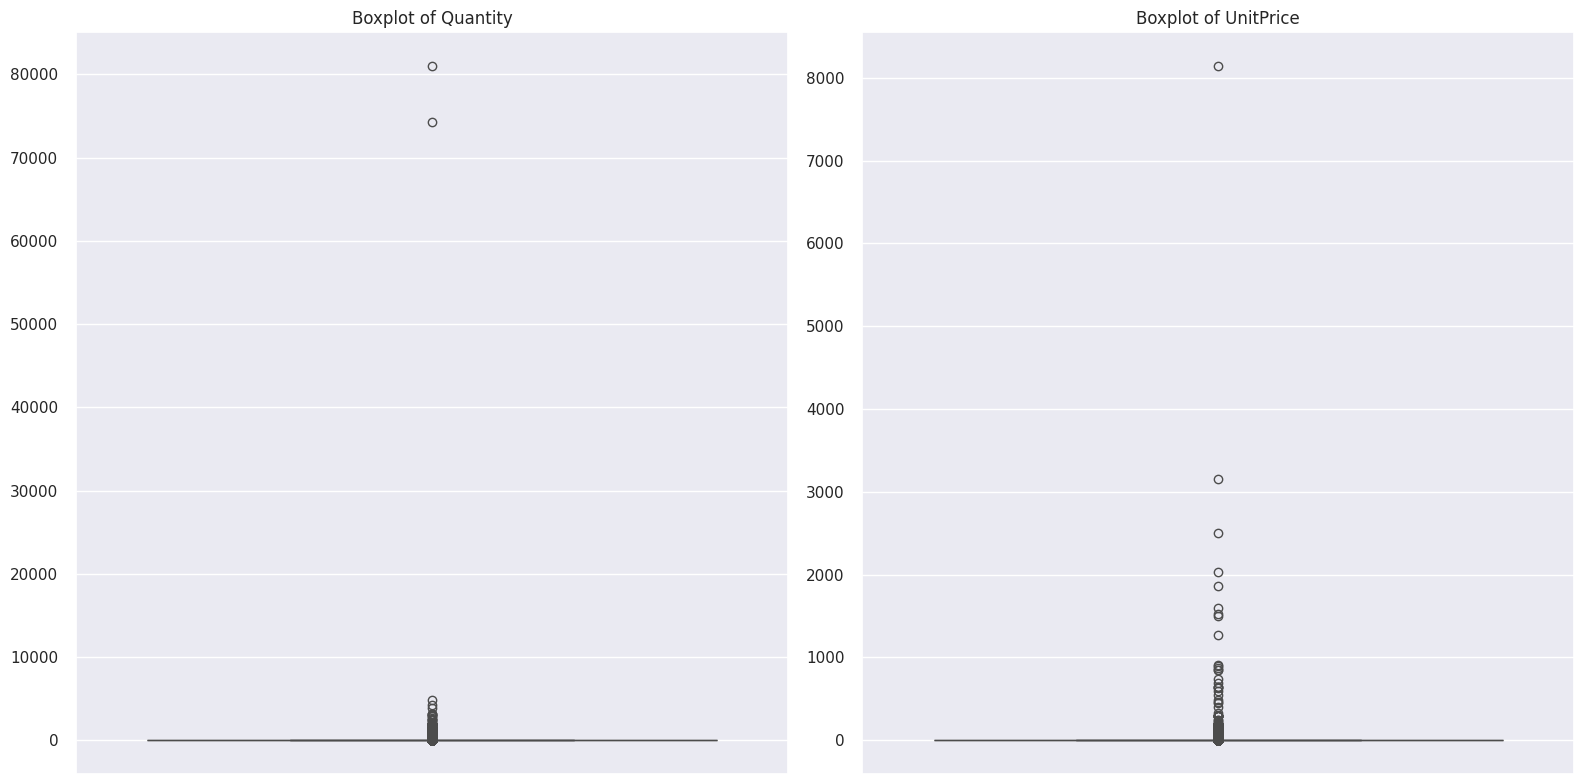

In [ ]:
# Plotting boxplots for each numerical column
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(1, len(numerical_columns.columns), i)
    sns.boxplot(y=uk_data[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Calculate z-scores for all numerical columns
z_scores = (uk_data[numerical_columns.columns] - uk_data[numerical_columns.columns].mean()) / uk_data[numerical_columns.columns].std()

# Set threshold for identifying outliers
threshold = 3

# Identify and remove outliers
outliers = (abs(z_scores) > threshold).any(axis=1)
uk_data_cleaned = uk_data[~outliers]

# Display the number of rows before and after outlier removal
print(f"Original data shape: {uk_data.shape}")
print(f"Data shape after outlier removal: {uk_data_cleaned.shape}")

Original data shape: (349203, 8)
Data shape after outlier removal: (348721, 8)


Number of outliers removed: 482


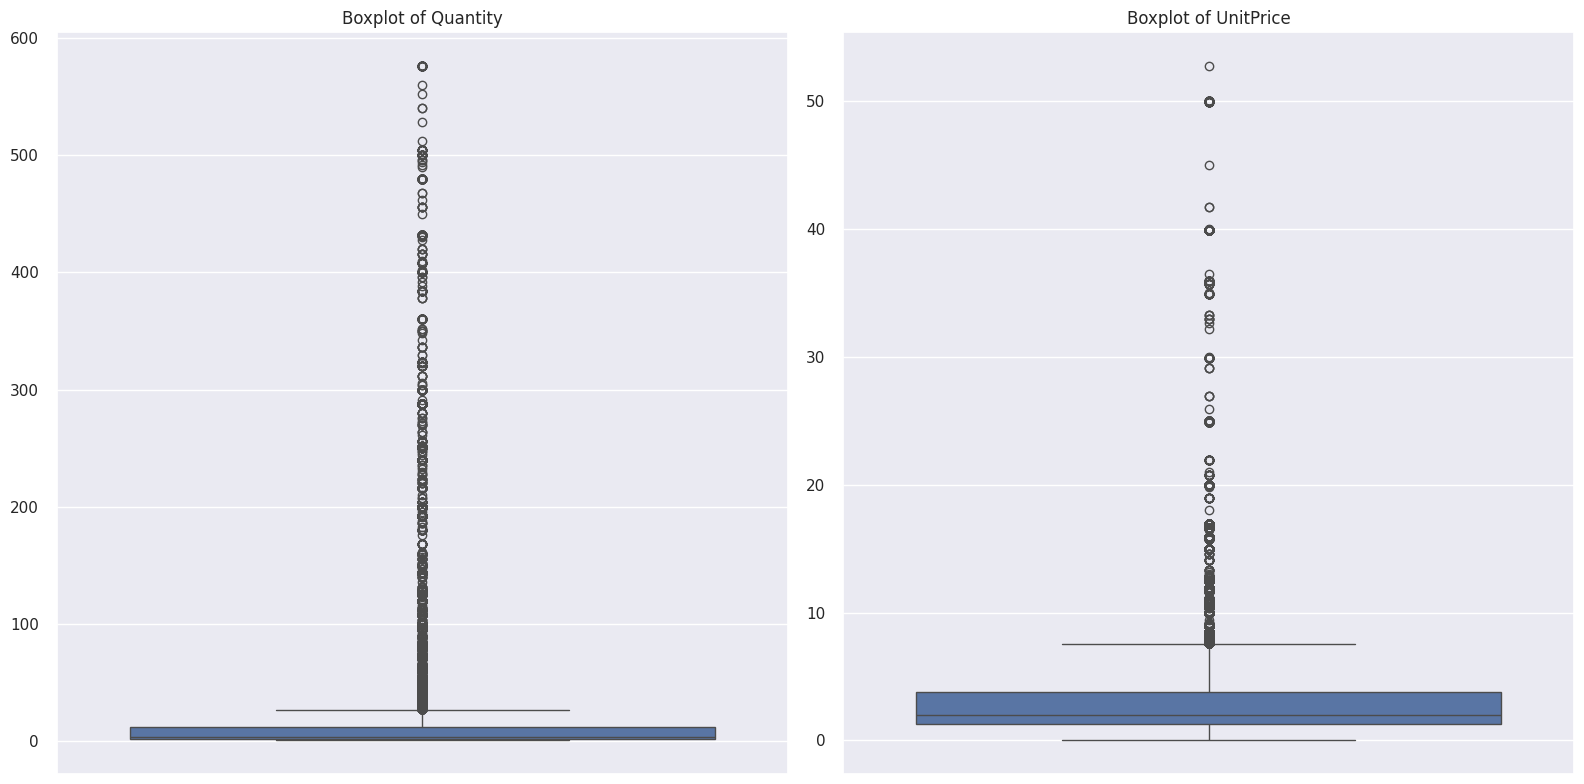

In [ ]:
# Inspect the removed outliers
removed_outliers = uk_data[outliers]
print(f"Number of outliers removed: {removed_outliers.shape[0]}")

# Visualize the cleaned data with boxplots
for i, column in enumerate(numerical_columns.columns, 1):
    plt.subplot(1, len(numerical_columns.columns), i)
    sns.boxplot(y=uk_data_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

**"How does the total sales quantity change over time on a monthly basis?**

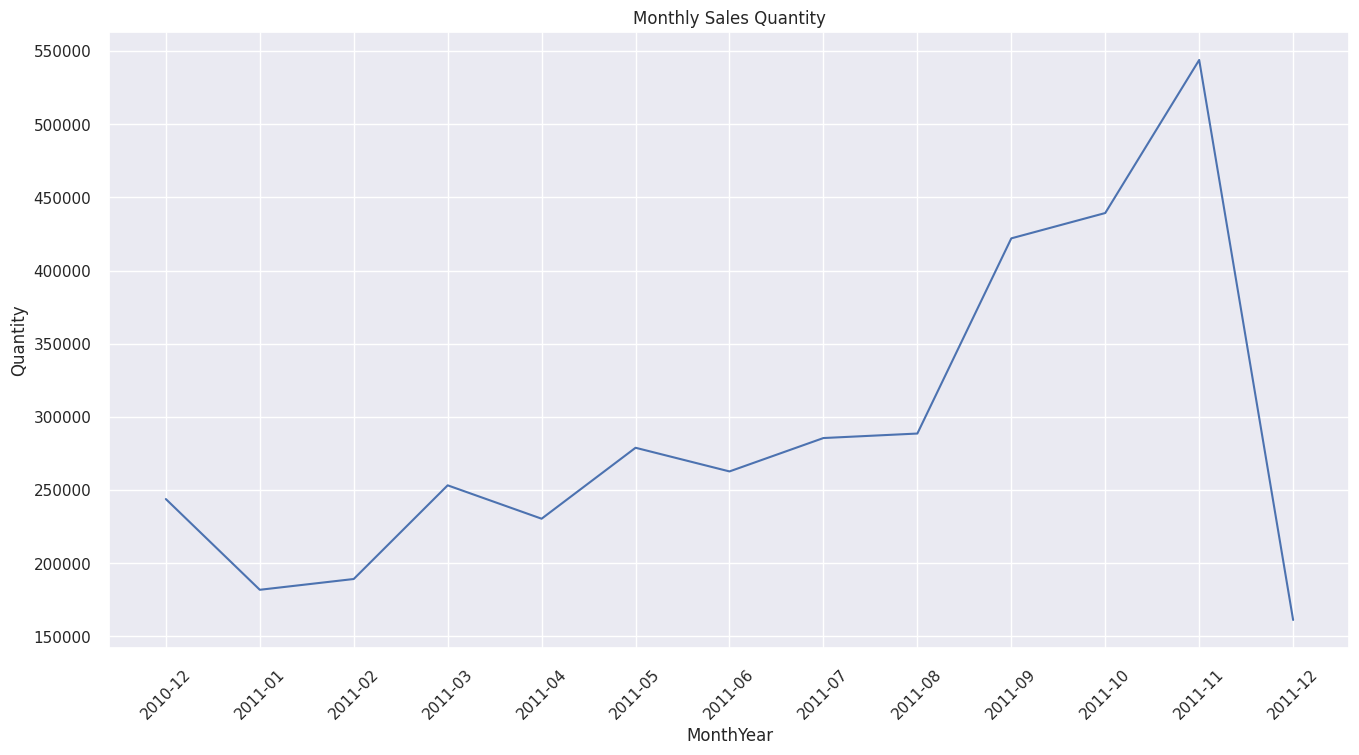

In [ ]:
# Create the MonthYear column
filtered_data = uk_data_cleaned.copy()
filtered_data.loc[:, 'MonthYear'] = filtered_data['InvoiceDate'].dt.to_period('M')

# Group by MonthYear and calculate the total Quantity for each month
monthly_sales = filtered_data.groupby('MonthYear')['Quantity'].sum().reset_index()

# Convert MonthYear to string for plotting
monthly_sales['MonthYear'] = monthly_sales['MonthYear'].astype(str)

# Plotting the monthly sales quantity
sns.lineplot(data=monthly_sales, x='MonthYear', y='Quantity')
plt.title('Monthly Sales Quantity')
plt.xticks(rotation=45)
plt.show()

**Observations:**

- Significant Growth: There is a noticeable increase in sales starting from September 2011, peaking in November 2011.
- Seasonality: The sharp rise in sales in the final quarter (October to December) suggests seasonality, likely driven by holiday shopping.
- December 2011: The significant drop in December 2011 is likely due to incomplete data for that month.

**"How has the total revenue generated from sales changed over time on a monthly basis?"**

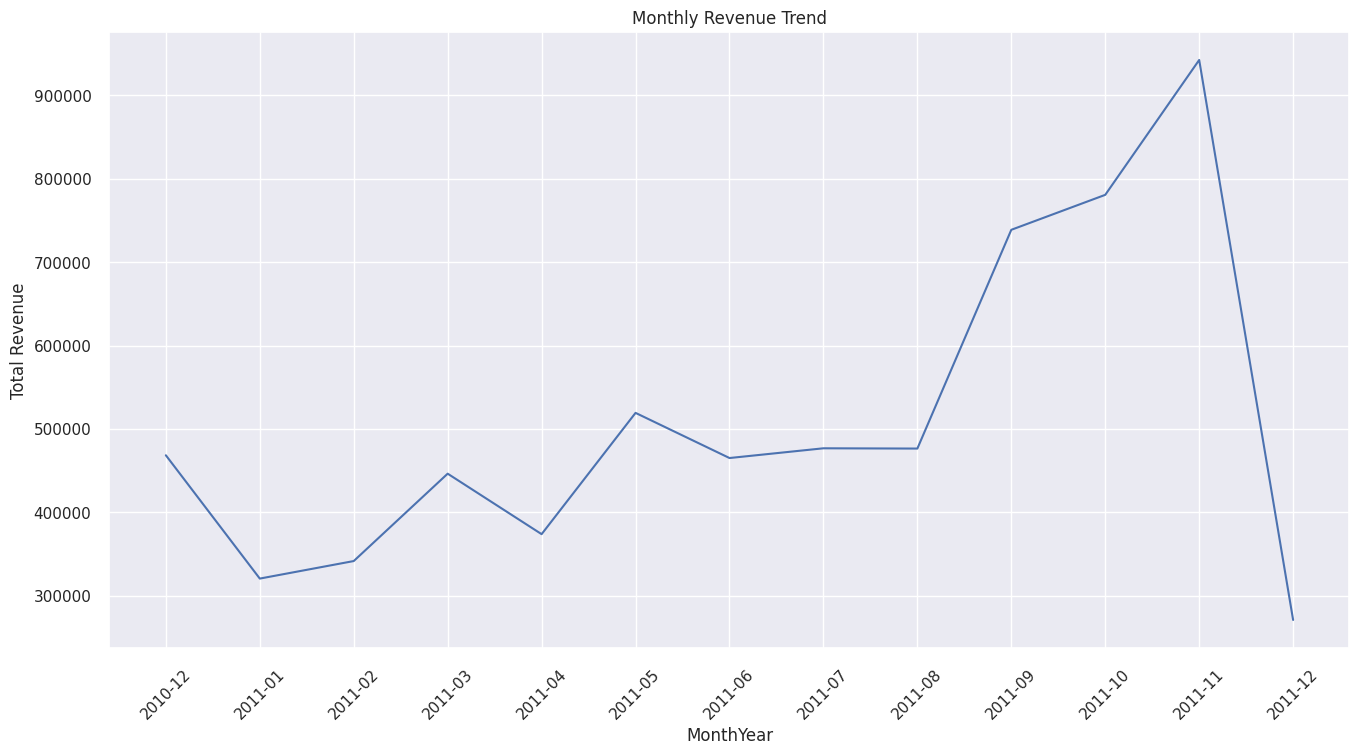

In [ ]:
# Calculate total sales for each transaction using .loc
filtered_data.loc[:, 'TotalSales'] = filtered_data['Quantity'] * filtered_data['UnitPrice']

# Group by MonthYear and calculate total revenue
monthly_revenue = filtered_data.groupby('MonthYear')['TotalSales'].sum().reset_index()

# Convert MonthYear to string for plotting
monthly_revenue['MonthYear'] = monthly_revenue['MonthYear'].astype(str)

# Plot the monthly revenue trend
sns.lineplot(data=monthly_revenue, x='MonthYear', y='TotalSales')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.ylabel('Total Revenue')
plt.show()

**Observations:**
- Revenue Growth: Similar to the quantity trends, revenue shows a significant increase starting in September 2011, peaking in November 2011.
- Seasonal Impact: The peak in revenue during the final quarter, particularly in November, aligns with the holiday shopping season, highlighting the importance of this period for the business.

**"How has the number of unique customers per month changed over time?"**

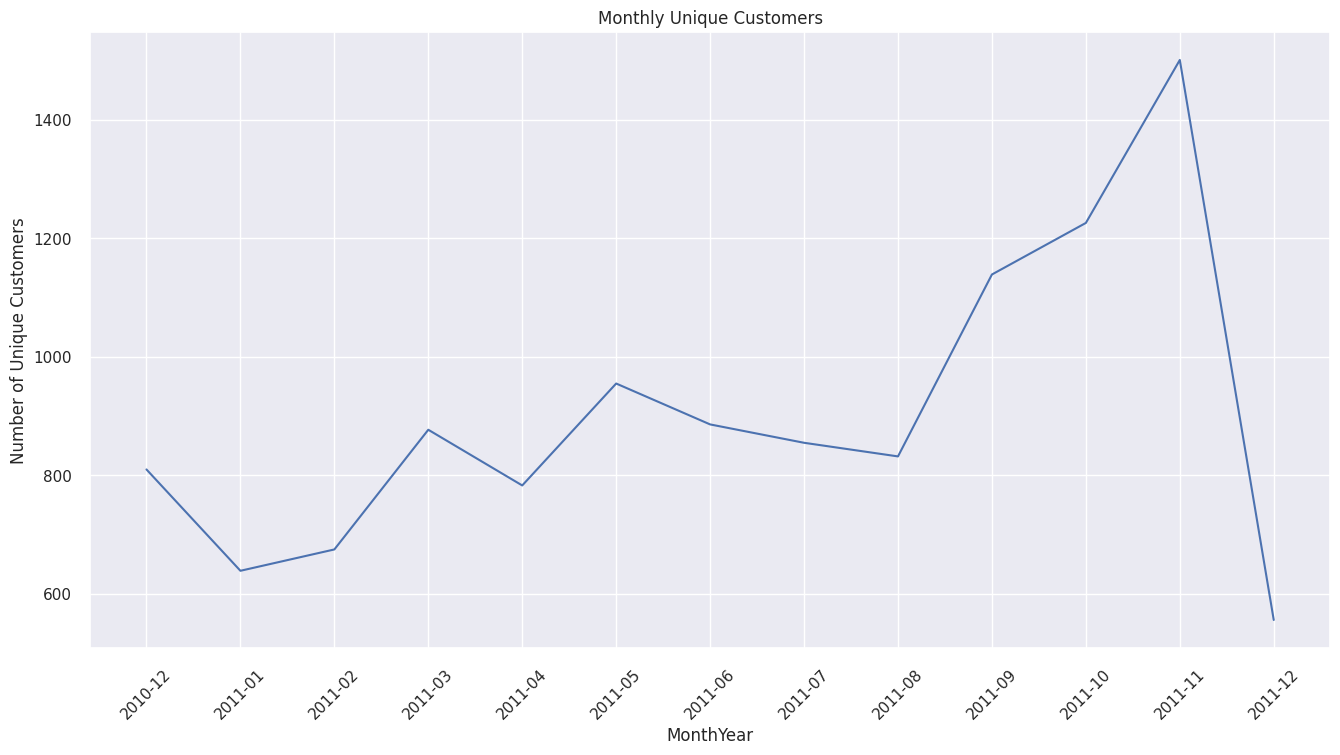

In [ ]:
# Group by MonthYear and calculate the number of unique customers
monthly_customers = filtered_data.groupby('MonthYear')['CustomerID'].nunique().reset_index()

# Convert MonthYear to string for plotting
monthly_customers['MonthYear'] = monthly_customers['MonthYear'].astype(str)

# Plot the number of unique customers by month
sns.lineplot(data=monthly_customers, x='MonthYear', y='CustomerID')
plt.title('Monthly Unique Customers')
plt.xticks(rotation=45)
plt.ylabel('Number of Unique Customers')
plt.show()

**Observations:**
- Customer Growth: The number of unique customers steadily increases from September 2011, peaking in November 2011. This mirrors the trends observed in both sales quantity and revenue, further emphasizing the impact of seasonality and potential marketing activities.
- Seasonal Influence: The peak in November indicates a strong seasonal effect, likely driven by holiday shopping, promotions, or events.

**"How has the average order value (AOV) per customer changed over time on a monthly basis?"**

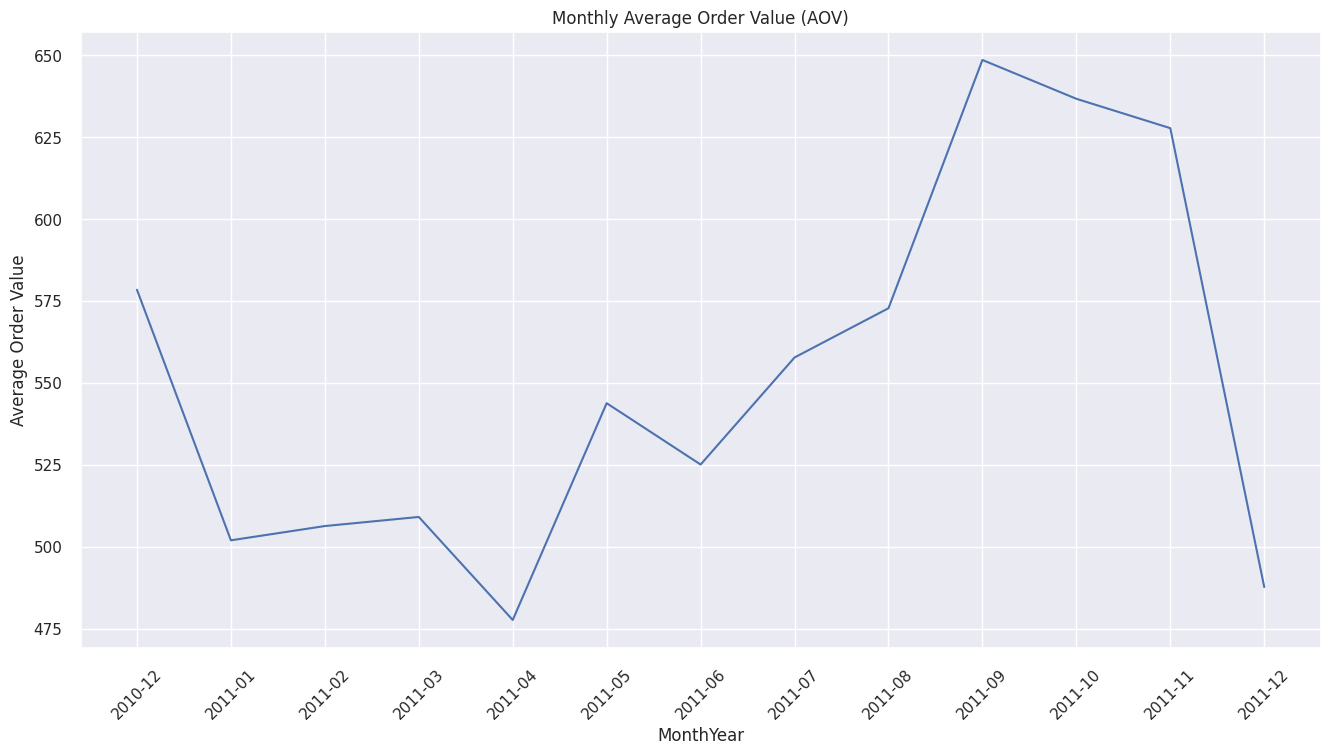

In [ ]:
# Calculate average order value (AOV) per month
monthly_aov = monthly_revenue.copy()
monthly_aov['AOV'] = monthly_aov['TotalSales'] / monthly_customers['CustomerID']

# Plot the monthly average order value
sns.lineplot(data=monthly_aov, x='MonthYear', y='AOV')
plt.title('Monthly Average Order Value (AOV)')
plt.xticks(rotation=45)
plt.ylabel('Average Order Value')
plt.show()

**Observations:**
- High AOV in Q4: The AOV peaks in September 2011, remaining high through November 2011. This suggests that customers are spending more per transaction during these months, likely due to holiday shopping or targeted promotions.
- Stable AOV: Throughout the year, the AOV remains relatively stable, with slight fluctuations, indicating consistent spending behavior by customers.

**"What are the top 10 products by sales quantity?"**

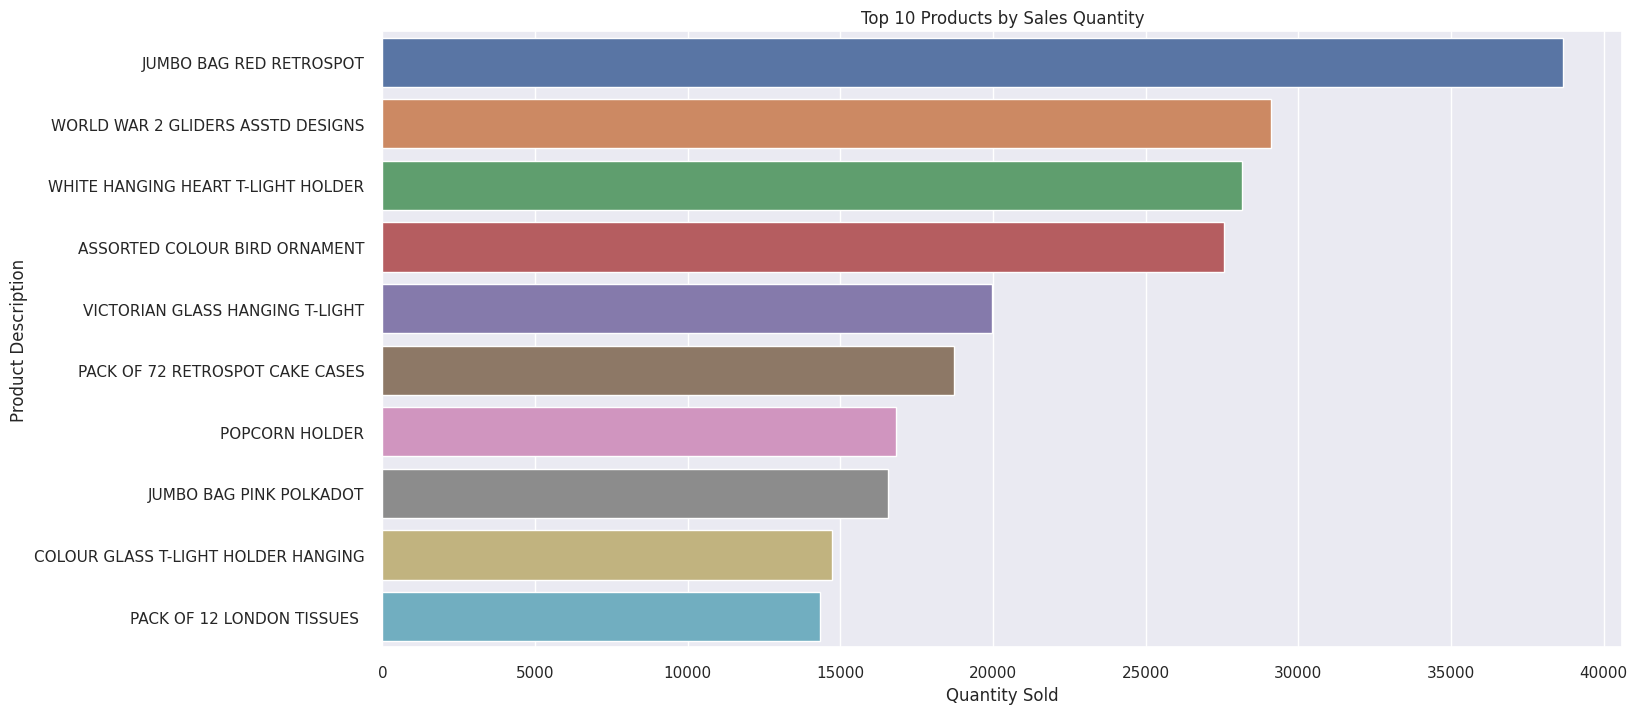

In [ ]:
# Group by product description and calculate total quantity sold
top_products = filtered_data.groupby('Description')['Quantity'].sum().nlargest(10).reset_index()

# Plot the top 10 products by sales quantity
sns.barplot(data=top_products, x='Quantity', y='Description', hue='Description')
plt.title('Top 10 Products by Sales Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

**Observations:**
- High Demand for Specific Products: The "JUMBO BAG RED RETROSPOT" stands out as the most popular product, significantly outperforming others in terms of quantity sold.
- Variety of Product Types: The top products include a mix of decorative items (e.g., T-light holders, bird ornaments) and practical items (e.g., cake cases, tissues), indicating diverse customer preferences.
- JUMBO Bags: Two variations of JUMBO bags ("RED RETROSPOT" and "PINK POLKADOT") are among the top sellers, suggesting a strong demand for these items.

**"How have the sales trends for the top 5 product categories evolved over time on a monthly basis?"**

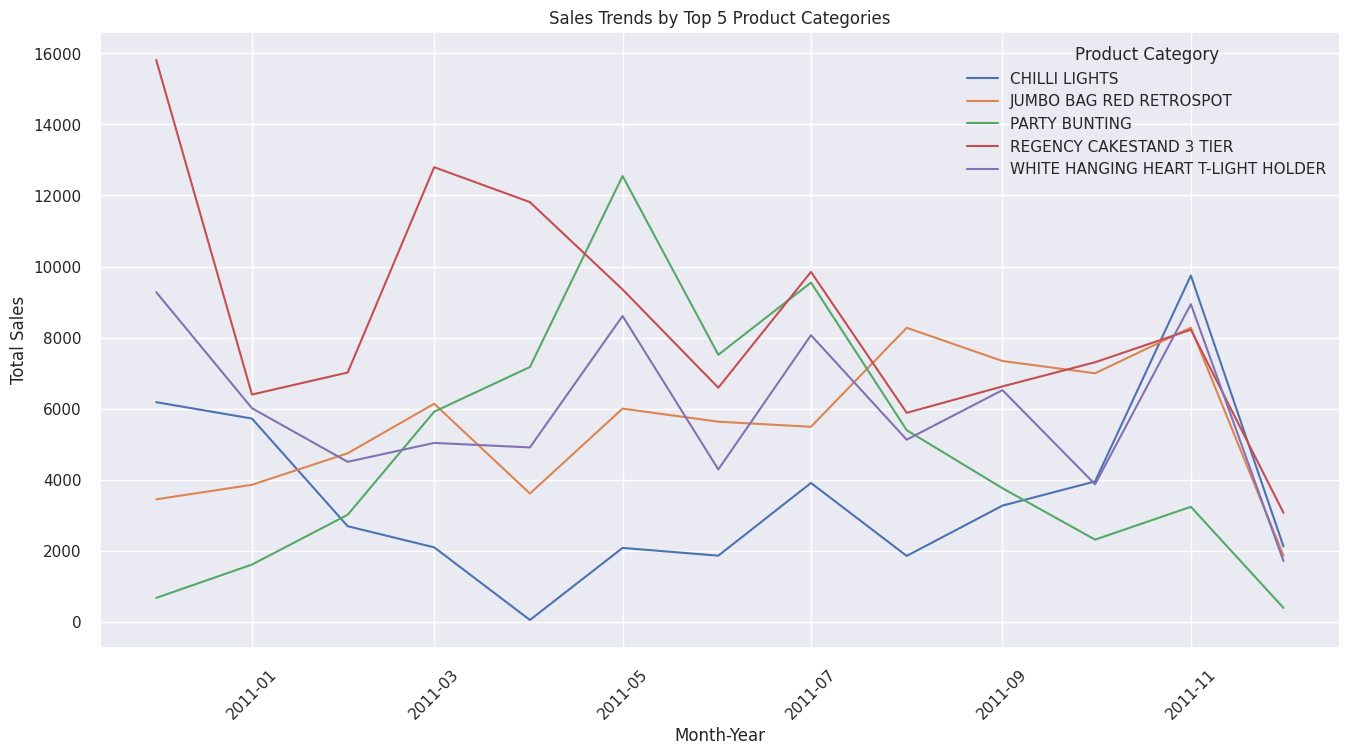

In [ ]:
# Group by MonthYear and ProductCategory, then calculate total sales
category_sales_trends = filtered_data.groupby(['MonthYear', 'Description'])['TotalSales'].sum().reset_index()

# Select top 5 product categories by total sales
top_categories = category_sales_trends.groupby('Description')['TotalSales'].sum().nlargest(5).index

# Filter data to include only top categories
category_sales_trends_top = category_sales_trends[category_sales_trends['Description'].isin(top_categories)].copy()

# Convert MonthYear to string for plotting
category_sales_trends_top['MonthYear'] = category_sales_trends_top['MonthYear'].dt.to_timestamp()

# Plot sales trends by product categories
plt.figure(figsize=(16, 8))
sns.lineplot(data=category_sales_trends_top, x='MonthYear', y='TotalSales', hue='Description')
plt.title('Sales Trends by Top 5 Product Categories')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Month-Year')
plt.legend(title='Product Category')
plt.show()

**Observations:**
- Seasonal Trends: There are clear seasonal trends, especially leading up to the holiday season in Q4. Products like "CHILLI LIGHTS" and "WHITE HANGING HEART T-LIGHT HOLDER" show significant spikes during these months.
- Consistent Performers: "JUMBO BAG RED RETROSPOT" and "REGENCY CAKESTAND 3 TIER" demonstrate strong and consistent sales across multiple months, suggesting a steady demand throughout the year.
- Marketing Opportunities: These insights can be leveraged to design targeted promotions during peak seasons and ensure adequate inventory levels for high-demand products.

**"On which day of the week do the most transactions occur?"**

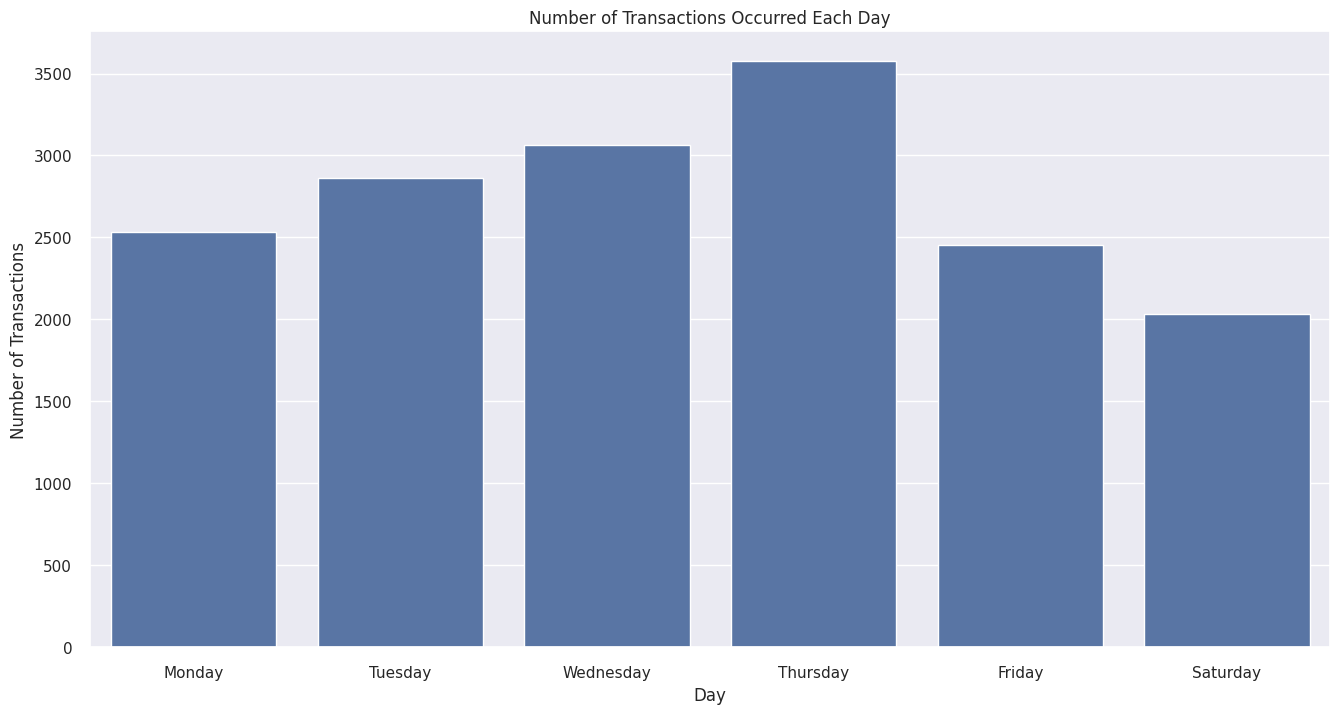

In [ ]:
order_day = filtered_data.groupby(filtered_data['InvoiceDate'].dt.dayofweek)['InvoiceNo'].nunique()

sns.barplot(x='InvoiceDate', y='InvoiceNo', data=order_day.reset_index())
plt.title('Number of Transactions Occurred Each Day')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.xticks(np.arange(6), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

**Observations:**
- Midweek Peaks: Sales are highest on Thursdays, followed by Wednesdays and Tuesdays. This indicates that midweek is the busiest period for transactions.
- Weekend Dip: There is a significant drop in sales on Fridays and Saturdays, which suggests that fewer customers are purchasing toward the end of the week or on weekends.

**Insights:**
- Focus on Midweek Promotions: The high sales volume during the midweek suggests that targeted promotions or product launches could be more effective if scheduled for Tuesday through Thursday.
- Weekend Strategy: The noticeable dip on Fridays and Saturdays presents an opportunity to explore why sales are lower. This could lead to strategic efforts to boost sales on these days, such as weekend-specific promotions or campaigns.

**"At what time of day do the most transactions occur?"**

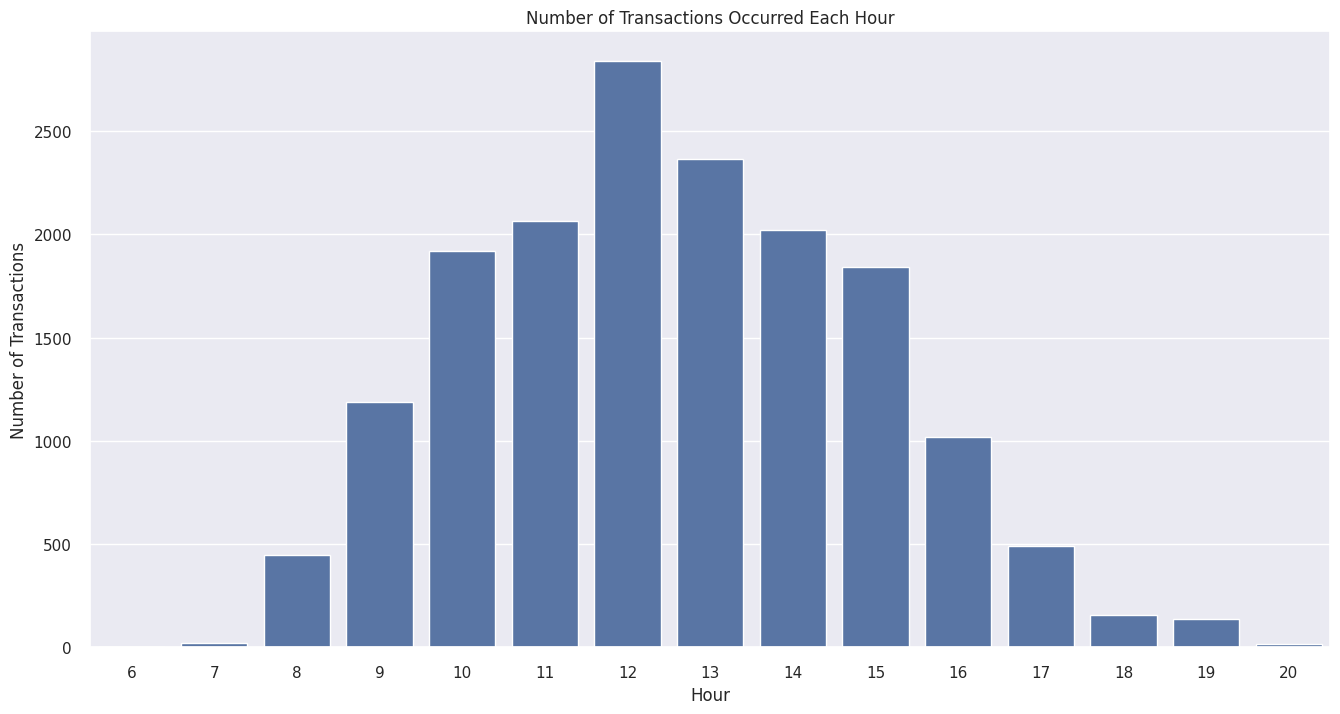

In [ ]:
order_hour = filtered_data.groupby(filtered_data['InvoiceDate'].dt.hour)['InvoiceNo'].nunique()

sns.barplot(x='InvoiceDate', y='InvoiceNo', data=order_hour.reset_index())
plt.title('Number of Transactions Occurred Each Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.xticks()
plt.show()

**Observations:**
- Peak Hours: The peak sales period occurs between 10:00 AM and 14:00 PM, with the highest number of invoices recorded at 12:00 PM.
- Morning Activity: Sales start to increase significantly from 08:00 AM onwards, reaching a steady rise through the morning hours.
- Afternoon Decline: After 14:00 PM, there is a gradual decline in sales, with a sharp drop after 17:00 PM.

**Insights:**
- Optimal Operation Hours: The busiest shopping hours are late morning to early afternoon, suggesting that these are the optimal times for ensuring staff availability, running time-sensitive promotions, or sending marketing communications.
- Potential for Evening Promotions: The significant drop in sales after 17:00 PM indicates a lower level of customer activity. This presents an opportunity to explore strategies that might encourage more evening purchases, such as limited-time offers or flash sales.

**"On which day of the week is the highest quantity of products sold?"**

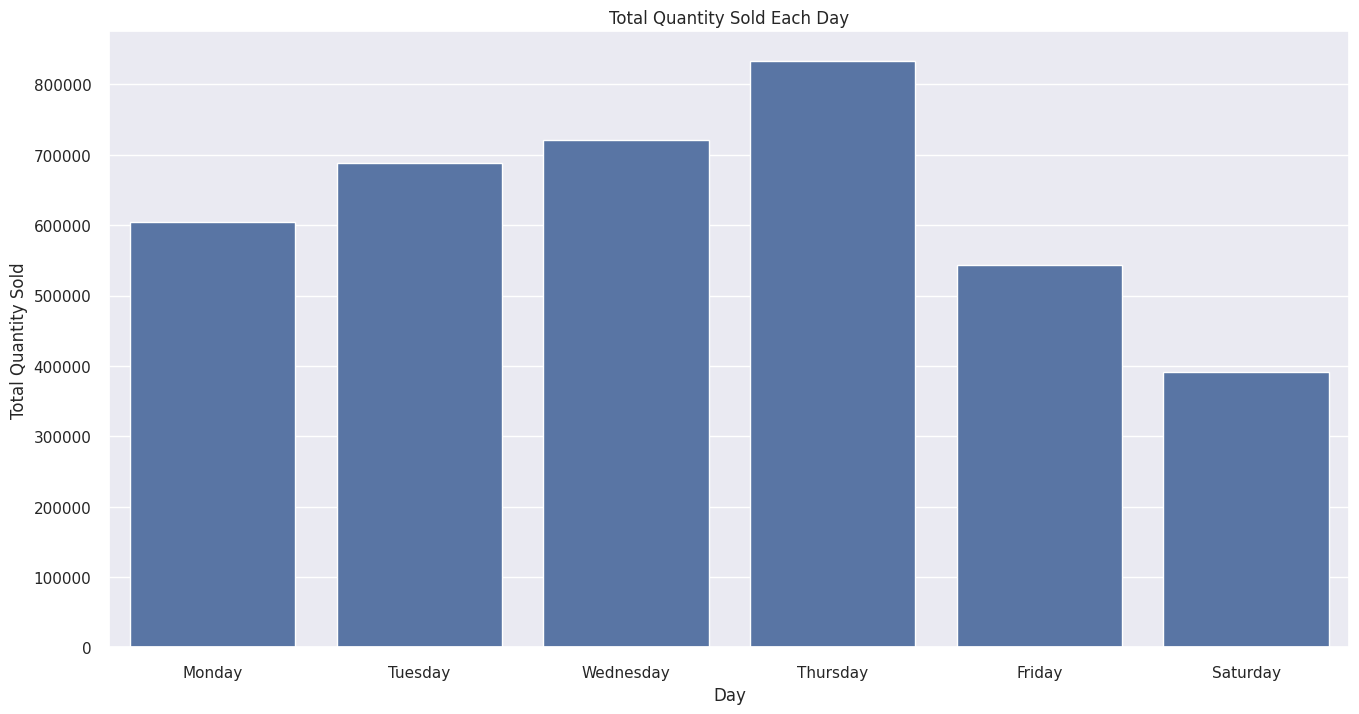

In [ ]:
order_day = filtered_data.groupby(filtered_data['InvoiceDate'].dt.dayofweek)['Quantity'].sum()
sns.barplot(x='InvoiceDate', y='Quantity', data=order_day.reset_index())
plt.title('Total Quantity Sold Each Day')
plt.xlabel('Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(np.arange(6), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

**Observations:**
- Peak Sales Day: Thursday is the peak day for sales in terms of quantity.
- Midweek Strength: Similar to the distribution of unique invoices, midweek days (Tuesday, Wednesday, and Thursday) show the highest sales quantities.
- Weekend Decline: The sales quantity drops significantly on Friday and Saturday, indicating lower consumer activity toward the end of the week.

**Insights:**
- Midweek Sales Focus: The concentration of sales on midweek days suggests that these are the most active shopping days. Retailers could capitalize on this by concentrating promotions, new product launches, or special deals during this period.
- Addressing Low Weekend Sales: The lower sales quantities on Fridays and Saturdays suggest that customers might be less engaged during the weekend. Exploring weekend promotions or offers could help to balance sales activity across the week.

**"Who are the top 5 customers that generate the highest revenue for the business?"**

Top 5 Customers by Revenue:
     CustomerID  TotalSales
3766      18102   238169.00
3299      17450   119617.91
3341      17511    90966.38
616       13694    63927.94
2754      16684    62391.56


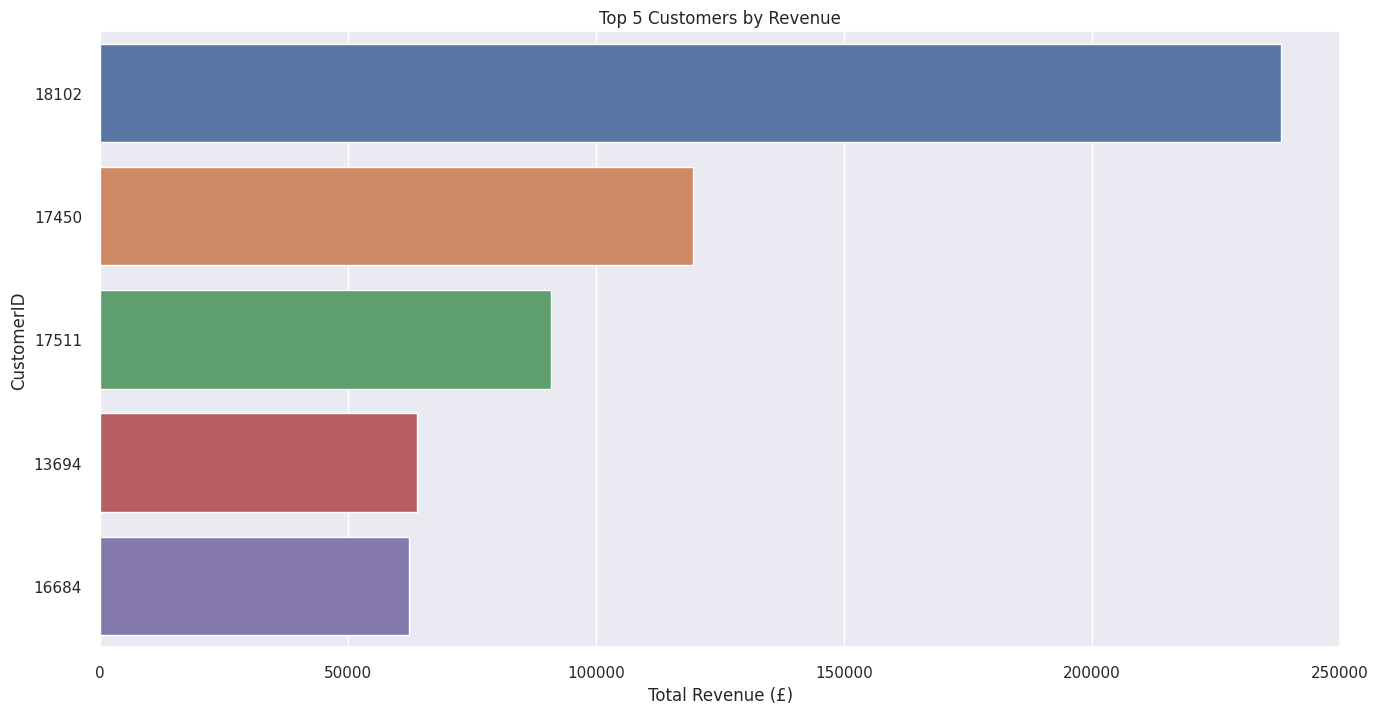

In [ ]:
# Calculate total revenue for each customer
customer_revenue = filtered_data.groupby('CustomerID')['TotalSales'].sum().reset_index()

# Sort customers by total revenue in descending order
top_customers = customer_revenue.sort_values(by='TotalSales', ascending=False).head(5)

# Display the top 5 customers
print("Top 5 Customers by Revenue:")
print(top_customers)

# Visualize the top 5 customers by revenue
sns.barplot(x='TotalSales', y='CustomerID', data=top_customers, hue='CustomerID')
plt.title('Top 5 Customers by Revenue')
plt.xlabel('Total Revenue (£)')
plt.ylabel('CustomerID')
plt.show()

**Observations:**
- Significant Revenue Contribution: The top customer (CustomerID 18102) contributes significantly more revenue than the others, with more than double the revenue of the second-highest customer.
- Revenue Concentration: The revenue generated by the top 5 customers is substantial, indicating that a small number of customers contribute a large portion of the overall revenue.

**Insights:**
- Customer Retention: It is essential to focus on retaining these high-value customers through personalized marketing, loyalty programs, and exclusive offers.
- Upselling Opportunities: Given their past spending, these customers are prime targets for upselling and cross-selling strategies.
- Potential Risk: The heavy reliance on a few customers for a significant portion of revenue poses a risk. Diversifying the customer base to reduce dependency on these top customers could be beneficial.

**"Who are the top 5 customers based on the frequency of their transactions?"**

Top 5 Most Frequent Customers:
     CustomerID  InvoiceNo
1         12748        207
3578      17841        124
189       13089         97
1263      14606         93
1764      15311         91


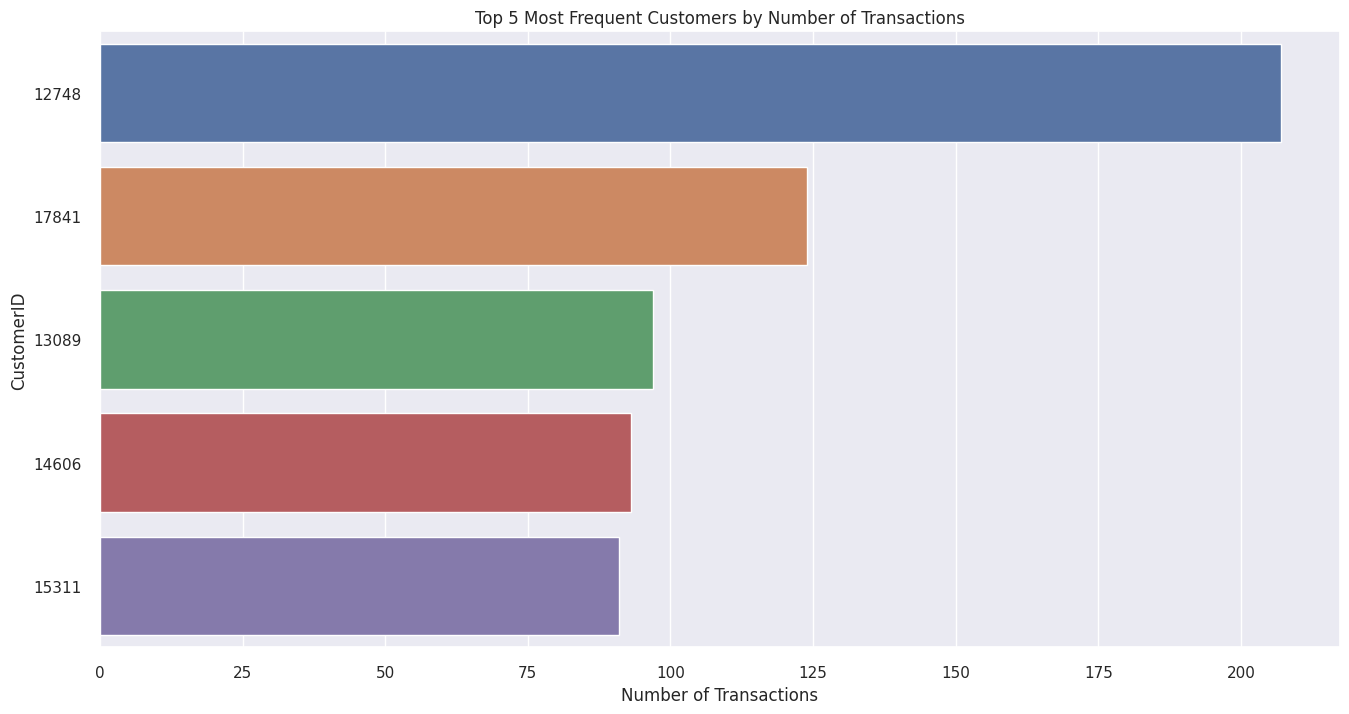

In [ ]:
# Count the number of transactions per customer
customer_frequency = filtered_data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Sort customers by the number of transactions in descending order
top_frequent_customers = customer_frequency.sort_values(by='InvoiceNo', ascending=False).head(5)

# Display the top 5 frequent customers
print("Top 5 Most Frequent Customers:")
print(top_frequent_customers)

# Visualize the top 5 frequent customers by transaction count
sns.barplot(x='InvoiceNo', y='CustomerID', data=top_frequent_customers, hue='CustomerID')
plt.title('Top 5 Most Frequent Customers by Number of Transactions')
plt.xlabel('Number of Transactions')
plt.ylabel('CustomerID')
plt.show()

**Observations:**
- High Transaction Frequency: CustomerID 12748 stands out with significantly more transactions than the others, suggesting a strong and consistent purchasing pattern.
- Engaged Customers: These customers are highly engaged, making frequent purchases and indicating strong brand loyalty.

**Insights:**
- Loyalty Programs: These frequent customers may benefit from a loyalty program that rewards them for their continued purchases, encouraging further engagement and retention.
- Personalized Marketing: Targeting these customers with personalized offers based on their purchase history could increase their spending and transaction frequency even more.
= Customer Value Analysis: Combining the transaction frequency with the revenue data can help identify customers who are not only frequent but also high-value, allowing for more focused marketing efforts.

**"How have the total quantity sold and the average unit price evolved over time, and what is the relationship between them?"**

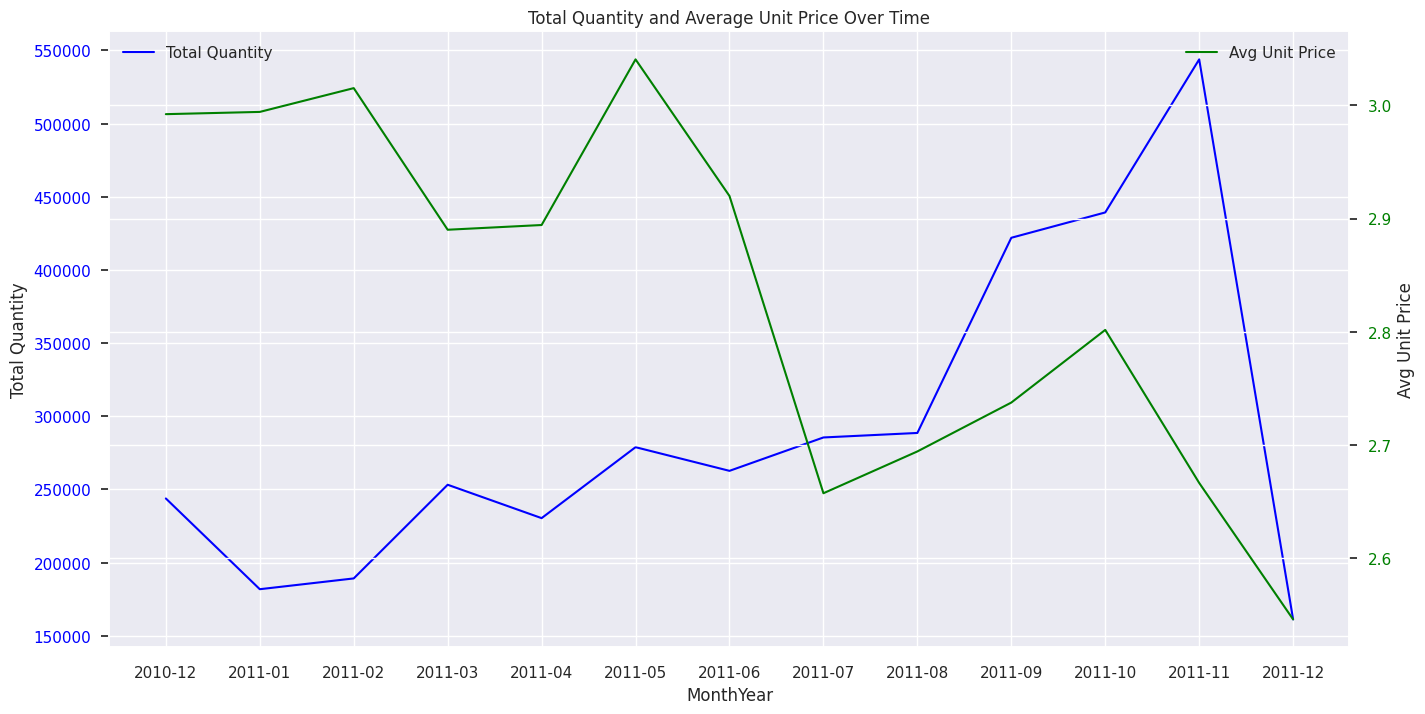

In [ ]:
fig, ax1 = plt.subplots(figsize=(16, 8))

# Group by MonthYear and calculate total quantity
monthly_quantity = filtered_data.groupby('MonthYear')['Quantity'].sum().reset_index()

# Group by MonthYear and calculate average unit price
monthly_avg_price = filtered_data.groupby('MonthYear')['UnitPrice'].mean().reset_index()

# Convert MonthYear to string for plotting
monthly_quantity['MonthYear'] = monthly_quantity['MonthYear'].astype(str)

# Convert MonthYear to string for plotting
monthly_avg_price['MonthYear'] = monthly_avg_price['MonthYear'].astype(str)

# Plotting total quantity on the left y-axis
sns.lineplot(data=monthly_quantity, x='MonthYear', y='Quantity', ax=ax1, label='Total Quantity', color='blue')
ax1.set_ylabel('Total Quantity')
ax1.set_xlabel('MonthYear')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis to plot the average unit price
ax2 = ax1.twinx()
sns.lineplot(data=monthly_avg_price, x='MonthYear', y='UnitPrice', ax=ax2, label='Avg Unit Price', color='green')
ax2.set_ylabel('Avg Unit Price')
ax2.tick_params(axis='y', labelcolor='green')

# Adding title and rotating x-axis labels
plt.title('Total Quantity and Average Unit Price Over Time')
plt.xticks(rotation=45)
plt.show()

**Observations:**
- Seasonal Sales Impact: There is a clear spike in sales quantity during September to November 2011, potentially driven by seasonal events such as the holiday shopping season. December's drop might indicate the dataset captures only part of that month's sales.
- Stable Pricing: Despite the fluctuations in quantity sold, the average unit price remains relatively stable, with no drastic changes.

**Insights:**
- Stock Management: The spike in sales during late 2011 should be considered for stock planning and resource allocation in similar future periods.
- Promotional Strategies: The stable pricing suggests that the company may benefit from introducing more dynamic pricing or promotions during months with lower sales quantities to stimulate demand.

## Cohort Analysis on Number of Unique Customers

In [ ]:
# Extract the month of the first purchase (CohortMonth) for each customer
filtered_data['InvoiceMonth'] = filtered_data['InvoiceDate'].dt.to_period('M')
cohort_data = filtered_data.groupby('CustomerID')['InvoiceMonth'].min().reset_index()
cohort_data.columns = ['CustomerID', 'CohortMonth']

# Merge CohortMonth back to the original DataFrame
filtered_data = pd.merge(filtered_data, cohort_data, on='CustomerID')

In [ ]:
# Calculate Cohort Index
# Calculate the difference in months between the InvoiceMonth and CohortMonth
filtered_data['CohortIndex'] = (
    (filtered_data['InvoiceMonth'].dt.year - filtered_data['CohortMonth'].dt.year) * 12 +
    (filtered_data['InvoiceMonth'].dt.month - filtered_data['CohortMonth'].dt.month) + 1
)

In [ ]:
# Build the Cohort Table
cohort_counts = filtered_data.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_counts.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

In [ ]:
cohort_pivot

CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2010-12      810.0  286.0  260.0  302.0  293.0  321.0  289.0  275.0  286.0   
2011-01      353.0   77.0   94.0   83.0  119.0   99.0   91.0   88.0  109.0   
2011-02      338.0   64.0   66.0   96.0   97.0   84.0   87.0   94.0   89.0   
2011-03      417.0   64.0  108.0   83.0   94.0   68.0  109.0   96.0  118.0   
2011-04      277.0   58.0   56.0   60.0   56.0   61.0   61.0   73.0   20.0   
2011-05      253.0   48.0   44.0   44.0   53.0   57.0   68.0   22.0    NaN   
2011-06      214.0   38.0   31.0   51.0   50.0   69.0   21.0    NaN    NaN   
2011-07      169.0   30.0   33.0   39.0   47.0   18.0    NaN    NaN    NaN   
2011-08      142.0   32.0   33.0   34.0   17.0    NaN    NaN    NaN    NaN   
2011-09      275.0   63.0   83.0   32.0    NaN    NaN    NaN    NaN    NaN   
2011-10      323.0   79.0   36.0    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11      297.0   35.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12       33.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12     13  
CohortMonth                              
2010-12      322.0  298.0  403.0  218.0  
2011-01      117.0  127.0   42.0    NaN  
2011-02      103.0   25.0    NaN    NaN  
2011-03       37.0    NaN    NaN    NaN  
2011-04        NaN    NaN    NaN    NaN  
2011-05        NaN    NaN    NaN    NaN  
2011-06        NaN    NaN    NaN    NaN  
2011-07        NaN    NaN    NaN    NaN  
2011-08        NaN    NaN    NaN    NaN  
2011-09        NaN    NaN    NaN    NaN  
2011-10        NaN    NaN    NaN    NaN  
2011-11        NaN    NaN    NaN    NaN  
2011-12        NaN    NaN    NaN    NaN

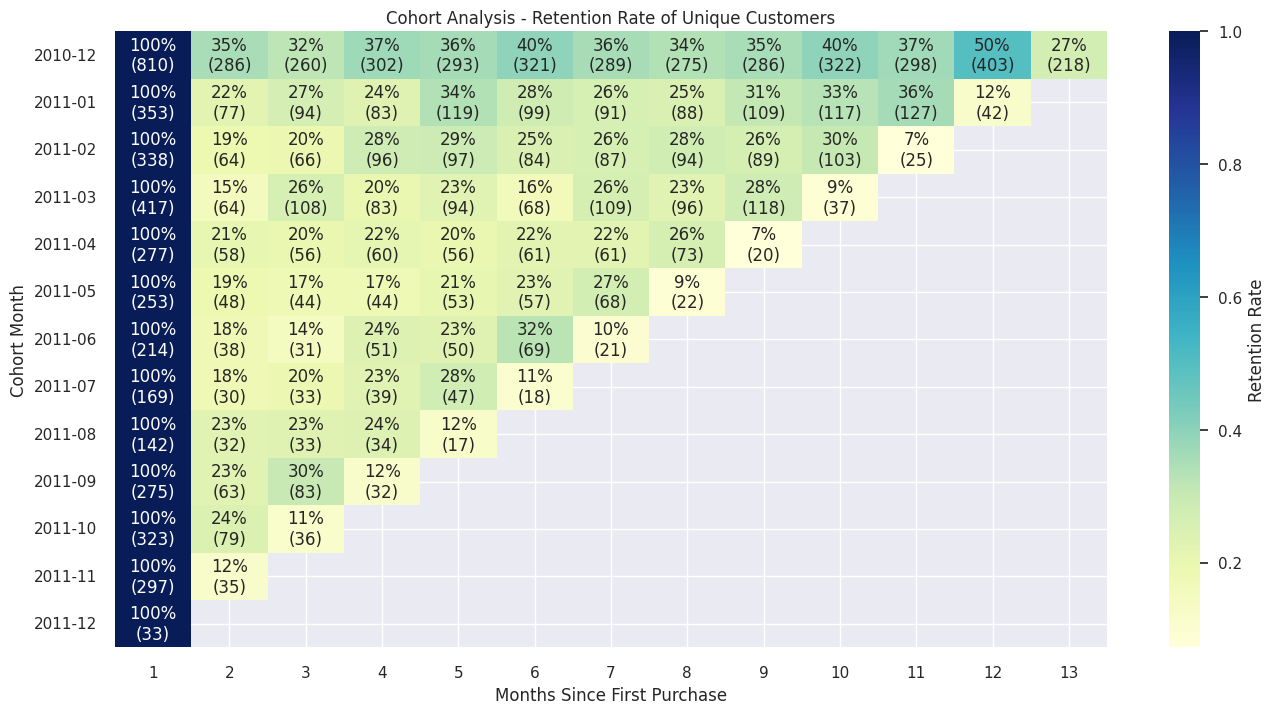

In [ ]:
# Calculate Retention Rate
cohort_size = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_size, axis=0)

# Prepare annotations
annotations = retention.copy().astype(str)
for i in range(annotations.shape[0]):
    for j in range(annotations.shape[1]):
        if not pd.isna(retention.iloc[i, j]):
            annotations.iloc[i, j] = f"{retention.iloc[i, j]:.0%}\n({int(cohort_pivot.iloc[i, j])})"

# Visualize the Cohort Analysis with annotations
plt.figure(figsize=(16, 8))
sns.heatmap(retention, annot=annotations, fmt='', cmap="YlGnBu", cbar_kws={'label': 'Retention Rate'})
plt.title('Cohort Analysis - Retention Rate of Unique Customers')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.show()

The Cohort Analysis provides a detailed view of customer retention over time. The heatmap visualizes how customers, grouped by their first purchase month (CohortMonth), are retained across subsequent months (CohortIndex).

**Key Observations:**
- Initial Retention (CohortIndex 1):

Retention starts at 100% for all cohorts, as this represents the first month when customers made their initial purchases.

- Retention Decline Over Time:

There is a noticeable decline in retention as the months progress. For example, the December 2010 cohort shows a significant drop from 100% to 35% by the second month (CohortIndex 2).
The retention rate continues to decline in subsequent months, indicating that fewer customers return to make repeat purchases over time.

- Highest Retention:

The December 2010 cohort demonstrates a relatively high retention in the subsequent months compared to other cohorts, with a peak retention of 50% in the 12th month (CohortIndex 12).

- Seasonal Influence:

Cohorts from late 2010 (such as December 2010) and early 2011 have higher retention rates in the initial months compared to mid-2011 cohorts, suggesting a potential seasonal influence, such as holiday shopping.

- Retention Variability:

Cohorts show variability in retention across months, with some months showing stronger retention (e.g., January 2011, which retains 33% by the 10th month).

- Short-Lived Retention in Later Cohorts:

Later cohorts, such as those from September 2011 onwards, demonstrate faster declines in retention, potentially due to the reduced observation window.

**Insights:**
- Customer Retention Strategy: The rapid decline in retention indicates a need for improved customer engagement strategies, particularly after the initial purchase. Strategies could include personalized marketing, loyalty programs, and follow-up communication to encourage repeat purchases.

- Seasonality and Customer Behavior: The stronger retention in cohorts starting around the holiday season (e.g., December 2010) suggests a seasonal impact on customer behavior. Targeted campaigns during these periods could be effective in boosting both initial and repeat purchases.

- Focus on Early Cohorts: Given the higher retention rates in earlier cohorts, analyzing the customer experience and purchasing patterns of these groups could offer insights into practices that successfully retain customers.

## Cohort Analysis on Total Sales

In [ ]:
# Build the Cohort Table for Total Sales
cohort_sales = filtered_data.groupby(['CohortMonth', 'CohortIndex'])['TotalSales'].sum().reset_index()
cohort_sales_pivot = cohort_sales.pivot(index='CohortMonth', columns='CohortIndex', values='TotalSales')

In [ ]:
# Calculate Retention Rate based on sales
cohort_sales_size = cohort_sales_pivot.iloc[:, 0]
sales_retention = cohort_sales_pivot.divide(cohort_sales_size, axis=0)

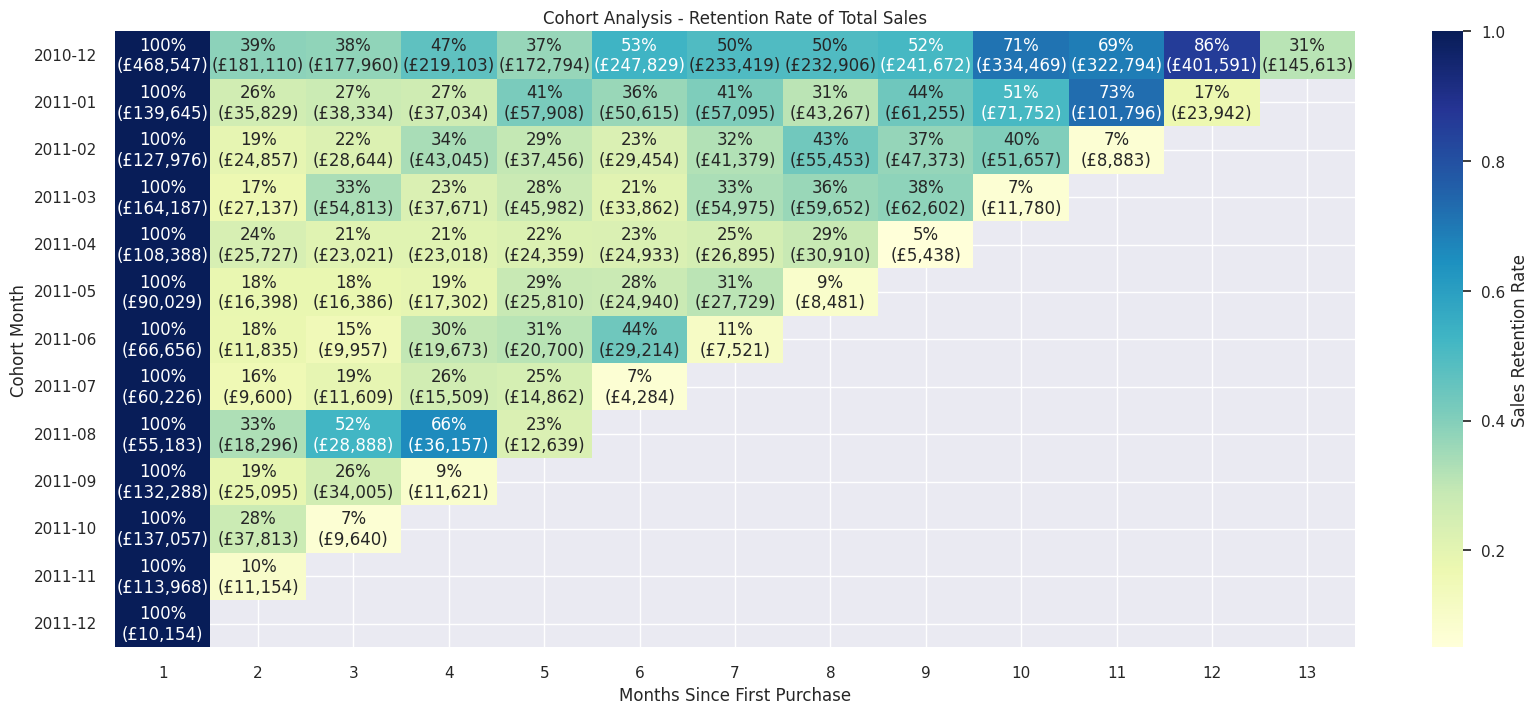

In [ ]:
# Prepare annotations with sales amount and retention rate
sales_annotations = sales_retention.copy().astype(str)
for i in range(sales_annotations.shape[0]):
    for j in range(sales_annotations.shape[1]):
        if not pd.isna(sales_retention.iloc[i, j]):
            sales_annotations.iloc[i, j] = f"{sales_retention.iloc[i, j]:.0%}\n(£{int(cohort_sales_pivot.iloc[i, j]):,})"

# Step 5: Visualize the Cohort Analysis with annotations
plt.figure(figsize=(20, 8))
sns.heatmap(sales_retention, annot=sales_annotations, fmt='', cmap="YlGnBu", cbar_kws={'label': 'Sales Retention Rate'})
plt.title('Cohort Analysis - Retention Rate of Total Sales')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.show()

The Cohort Analysis for Total Sales provides a comprehensive view of how revenue generated by each customer cohort evolves over time. This analysis groups customers by the month they made their first purchase (CohortMonth) and tracks the percentage of total sales retained in the following months (CohortIndex). Additionally, the heatmap includes annotations showing both the retention rate and the total sales amount in GBP (£).

**Key Observations:**
- Strong Initial Sales Retention (CohortIndex 1):

Each cohort starts with 100% of total sales retention in the first month, as this reflects the initial purchases made by customers in that cohort.

- High Sales Retention in Early Cohorts:

The December 2010 cohort shows significant retention across multiple months, peaking at 86% in the 12th month (CohortIndex 12). This indicates that customers acquired during this period had substantial long-term value.
Similarly, the January 2011 and February 2011 cohorts show higher sales retention rates, especially in the early months.

- Noticeable Decline in Later Cohorts:

Cohorts from August 2011 onwards show more variability and lower retention rates, with some months (e.g., September 2011) having a sharp drop in sales retention.
The November 2011 cohort shows particularly low retention (10% in the second month), likely due to the reduced observation window.

- Seasonal Effects:

The significant sales retention in the December 2010 cohort aligns with holiday shopping, highlighting the importance of peak seasons for long-term customer value.

- Variable Retention Across Months:

Sales retention fluctuates for different cohorts across various months, which could be attributed to factors such as promotional activities, product availability, or broader economic conditions.

**Insights:**
- Maximizing Long-Term Sales:

The strong retention rates in early cohorts suggest the effectiveness of customer engagement and marketing strategies during those periods. Analyzing what contributed to these higher retention rates could help replicate that success in future campaigns.

- Focus on High-Value Periods:

The December 2010 and January 2011 periods demonstrate significant long-term sales retention. Targeting similar high-value periods with focused marketing campaigns could drive higher customer lifetime value (CLTV).

- Improving Retention in Later Cohorts:

The drop in retention for later cohorts, particularly from September 2011 onwards, indicates a need for tailored retention strategies, such as personalized offers or loyalty programs, to sustain sales.

- Actionable Strategies:

Consider enhancing customer engagement through post-purchase follow-ups, targeted promotions, and seasonal campaigns to boost retention, especially for high-value periods like the holiday season.

## Cohort Analysis on Product Category

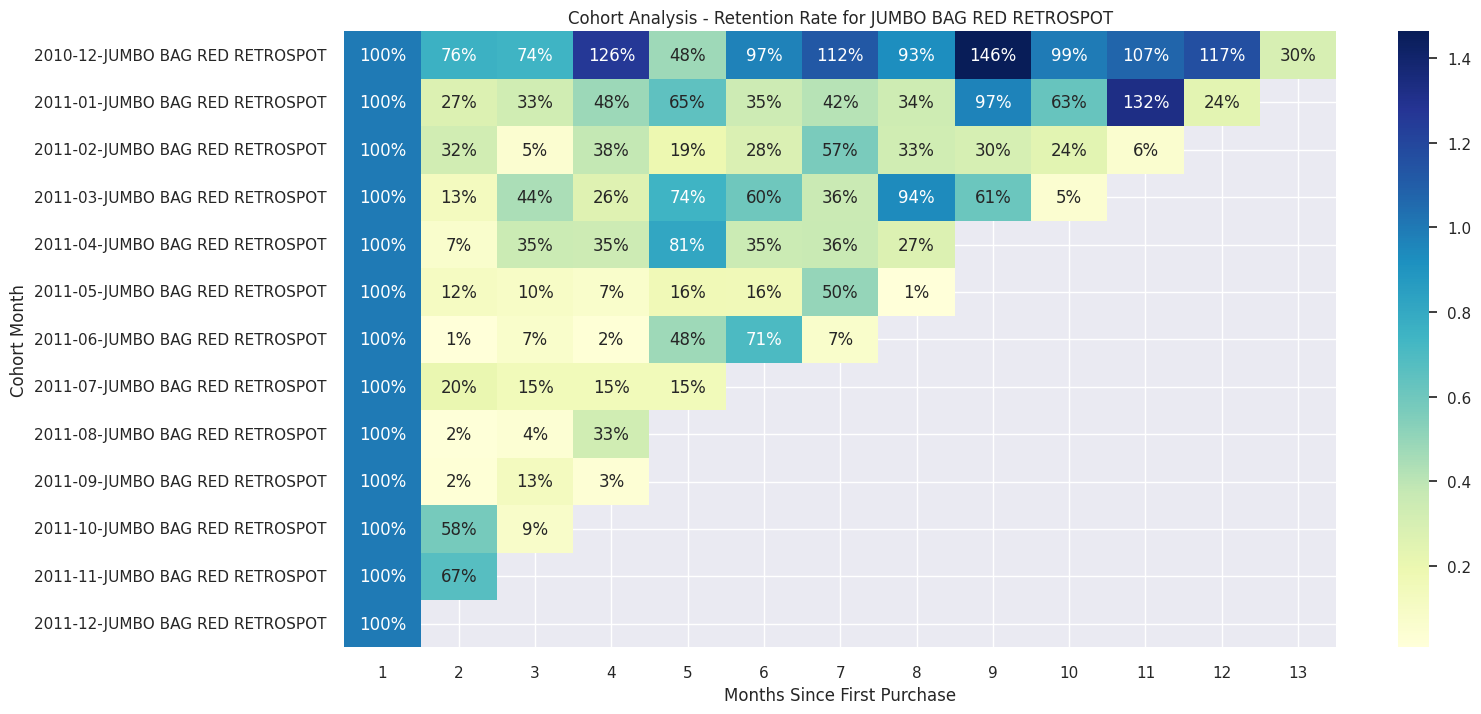

In [ ]:
# Choose segmentation attribute
filtered_data['ProductCategory'] = filtered_data['Description']

# Group data by CohortMonth, CohortIndex, and Product Category
cohort_category_sales = filtered_data.groupby(['CohortMonth', 'CohortIndex', 'ProductCategory'])['TotalSales'].sum().reset_index()

# Pivot the data to create the cohort table
category_sales_pivot = cohort_category_sales.pivot_table(index=['CohortMonth', 'ProductCategory'], columns='CohortIndex', values='TotalSales')

# Calculate the retention or total sales metrics
category_sales_size = category_sales_pivot.iloc[:, 0]
category_sales_retention = category_sales_pivot.divide(category_sales_size, axis=0)

# Visualize the Cohort Analysis for a specific Product Category
specific_category = 'JUMBO BAG RED RETROSPOT'
category_heatmap = category_sales_retention.loc[(slice(None), specific_category), :]

plt.figure(figsize=(16, 8))
sns.heatmap(category_heatmap, annot=True, fmt='.0%', cmap="YlGnBu")
plt.title(f'Cohort Analysis - Retention Rate for {specific_category}')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.show()

This cohort analysis focuses on the "JUMBO BAG RED RETROSPOT" product category, the most popular product. It tracks the sales retention rate over time for different cohorts of customers who first purchased this product during specific months. The analysis helps to identify patterns in repeat purchases and customer loyalty for this particular product category.

**Key Observations:**
- Strong Initial Sales in December 2010:

The December 2010 cohort shows significant retention across multiple months, with a peak in the 4th month (CohortIndex 4) at 126%. This could be due to repeat purchases during the holiday season or successful follow-up promotions.

- Fluctuating Retention in Later Cohorts:

The January 2011 cohort shows a strong retention rate of 132% in the 11th month, indicating high repeat purchases during this period.
However, cohorts from February 2011 onwards show more variability, with some months exhibiting low retention rates, which suggests less consistent repeat purchases for this product category.

- Sharp Decline in Retention for Some Cohorts:

Certain cohorts, such as April 2011 and May 2011, exhibit a steep decline in retention rates after the initial months, indicating a drop in repeat purchases for this product.

- Seasonal Effects:

The October 2011 and November 2011 cohorts show higher retention rates, possibly due to seasonal factors like holiday shopping.

- Minimal Retention in the Most Recent Cohorts:

Cohorts from September 2011 onwards show a significant drop in retention, with many months having no repeat purchases. This could be due to limited observation periods or declining interest in the product.

**Insights:**
- Leverage High-Retention Periods:

The high retention rates in December 2010 and January 2011 indicate periods of strong customer engagement. Strategies such as targeted marketing or promotional campaigns during similar periods could help replicate this success.

- Address Declining Retention:

The significant drop in retention for later cohorts suggests a need for targeted retention strategies, such as personalized offers or loyalty programs, to encourage repeat purchases.

- Seasonal Promotions:

The increase in retention during October and November points to the importance of holiday season promotions. Expanding these efforts could enhance retention for other product categories as well.

- Improve Retention for Newer Cohorts:

The sharp decline in retention for cohorts from May 2011 onwards highlights the need to revisit marketing strategies for this product, potentially by re-engaging customers with personalized offers or reminders.

## RFMT Modeling and Segmentation

The Recency, Frequency, and Monetary (RFM) analysis is a powerful method for segmenting customers based on their purchasing behavior. Here’s how each component is calculated:

- Recency: Measures the number of days since the customer's last purchase. Customers who have purchased recently are generally more engaged.
- Frequency: Counts the number of transactions made by the customer. Higher frequency indicates a more loyal customer.
- Monetary: Calculates the total amount spent by the customer. Higher monetary values suggest more valuable customers.

In [ ]:
# Define the reference date for recency calculation
reference_date = filtered_data['InvoiceDate'].max() + pd.DateOffset(1)

# Calculate Recency, Frequency, and Monetary
rfm = filtered_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalSales': 'sum'
}).reset_index()

# Rename columns for clarity
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [ ]:
reference_date

Timestamp('2011-12-10 12:49:00')

The reference date is set as one day after the last recorded transaction. In this case, the reference date is 10th December 2011, 12:49 PM.

**Calculate Interpurchase Time (T)**

InterPurchase Time, is a measure of average time gap between total shopping trips by a customer. The Interpurchase Time is calcluted by the following formula:

**T = (Tn - T1)/(F-1)**

- T --> Interpurchase Time
- F --> Frequency
- T1 --> First purchase
- Tn --> Last purchase

In [ ]:
# Filter customers with more than one purchase
rfm = rfm[rfm['Frequency'] > 1].copy()

# Calculate the first and last purchase dates
purchase_dates = filtered_data.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max']).reset_index()
purchase_dates.columns = ['CustomerID', 'FirstPurchase', 'LastPurchase']

# Merge with RFM data
rfm = pd.merge(rfm, purchase_dates, on='CustomerID')

# Calculate Interpurchase Time (T)
rfm['InterpurchaseTime'] = (rfm['LastPurchase'] - rfm['FirstPurchase']).dt.days / (rfm['Frequency'] - 1)

- To further enhance the segmentation of customers, we calculate the Interpurchase Time (T), which represents the average number of days between consecutive purchases for customers who have made more than one purchase. This metric helps identify how regularly a customer makes purchases, which can be crucial for targeting marketing campaigns and predicting future buying behavior.
- This metric, when combined with RFM scores, enables businesses to identify not just valuable and loyal customers but also those who purchase frequently over short or long intervals.

In [ ]:
# Assign quantile-based ranks:
# R_rank and T_rank: Reverse scoring where 1 is the highest rank (recent purchases, shorter interpurchase times).
# F_rank and M_rank: Regular scoring where 4 is the highest rank (higher frequency and monetary spend).
rfm['R_rank'] = pd.qcut(rfm['Recency'], 4, [4, 3, 2, 1])
rfm['F_rank'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, [1, 2, 3, 4])
rfm['M_rank'] = pd.qcut(rfm['Monetary'].rank(method='first'), 4, [1, 2, 3, 4])
rfm['T_rank'] = pd.qcut(rfm['InterpurchaseTime'], 4, [4, 3, 2, 1])

In [ ]:
# Combine RFM and T ranks
rfm['RFMT_Score'] = (
    rfm['R_rank'].astype(str) +
    rfm['F_rank'].astype(str) +
    rfm['M_rank'].astype(str) +
    rfm['T_rank'].astype(str)
)

In [ ]:
def rfmt_segment(row):
    if row['RFMT_Score'] == '4444':
        return 'Champion'
    elif row['RFMT_Score'][0] == '4':
        return 'Loyal Customer'
    elif row['RFMT_Score'][1] == '4':
        return 'Frequent Customer'
    elif row['RFMT_Score'][2] == '4':
        return 'Big Spender'
    elif row['RFMT_Score'][3] == '4':
        return 'Consistent Shopper'
    elif row['RFMT_Score'] in ['1111', '2111', '1211', '2211']:
        return 'Lost Customer'
    elif row['RFMT_Score'][0] == '1':
        return 'At Risk'
    else:
        return 'Others'

# Apply the function to each row
rfm['Segment'] = rfm.apply(rfmt_segment, axis=1)

In [ ]:
# Analyze the Segment Distribution
segment_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'],
    'InterpurchaseTime': 'mean'
}).reset_index()

# Display the Segment Summary
print("RFMT Segment Summary:")
segment_summary

RFMT Segment Summary:


Segment     Recency  Frequency      Monetary        \
                             mean       mean          mean count   
0             At Risk  152.104000   2.970667    891.854907   375   
1         Big Spender   59.388430   4.495868   3359.623727   121   
2            Champion    4.384146  25.365854  14463.316280   164   
3  Consistent Shopper  115.661017   2.661017    637.975805   236   
4   Frequent Customer   42.145161  10.496774   4112.736419   310   
5       Lost Customer  103.081871   2.222222    365.955327   171   
6      Loyal Customer    5.892000   5.530000   1831.997360   500   
7              Others   34.857778   3.465185   1009.166920   675   

  InterpurchaseTime  
               mean  
0         77.456578  
1         70.068733  
2         17.108594  
3         13.566314  
4         33.884598  
5        170.511696  
6         66.384817  
7        103.517259

The RFMT (Recency, Frequency, Monetary, and Interpurchase Time) analysis is a comprehensive method used to segment customers based on their purchasing behavior. Each customer is assigned a score across four dimensions—Recency, Frequency, Monetary, and Interpurchase Time—ranked on a scale of 1 to 4. The scores are then combined into a composite RFMT score, which is used to categorize customers into distinct segments.

**Assign Quantile-Based Ranks:**

- Recency (R): Customers are divided into four groups based on how recently they made a purchase, with the lowest value (1) representing the most recent purchasers.
- Frequency (F): Customers are ranked based on the number of purchases, with the highest frequency receiving the highest rank (4).
- Monetary (M): Customers are ranked by the total amount spent, with the highest spenders receiving the highest rank (4).
- Interpurchase Time (T): Customers are ranked based on the average time between purchases, with the shortest intervals receiving the highest rank (4).
Combine RFM and T Ranks:

A composite score (RFMT_Score) is created by concatenating the ranks for each dimension.

**Segment Assignment:**

Customers are segmented into various categories based on their RFMT score:
- Champion: Customers with the highest ranks across all dimensions (4444).
- Loyal Customer: Customers with high recency (R=4) scores.
- Frequent Customer: Customers with high frequency (F=4) scores.
- Big Spender: Customers with high monetary value (M=4).
- Consistent Shopper: Customers with low interpurchase time (T=4).
- Lost Customer: Customers with low scores across all dimensions (1111 or similar).
- At Risk: Customers with low recency (R=1) scores.
- Others: Customers who do not fit neatly into any of the above categories.

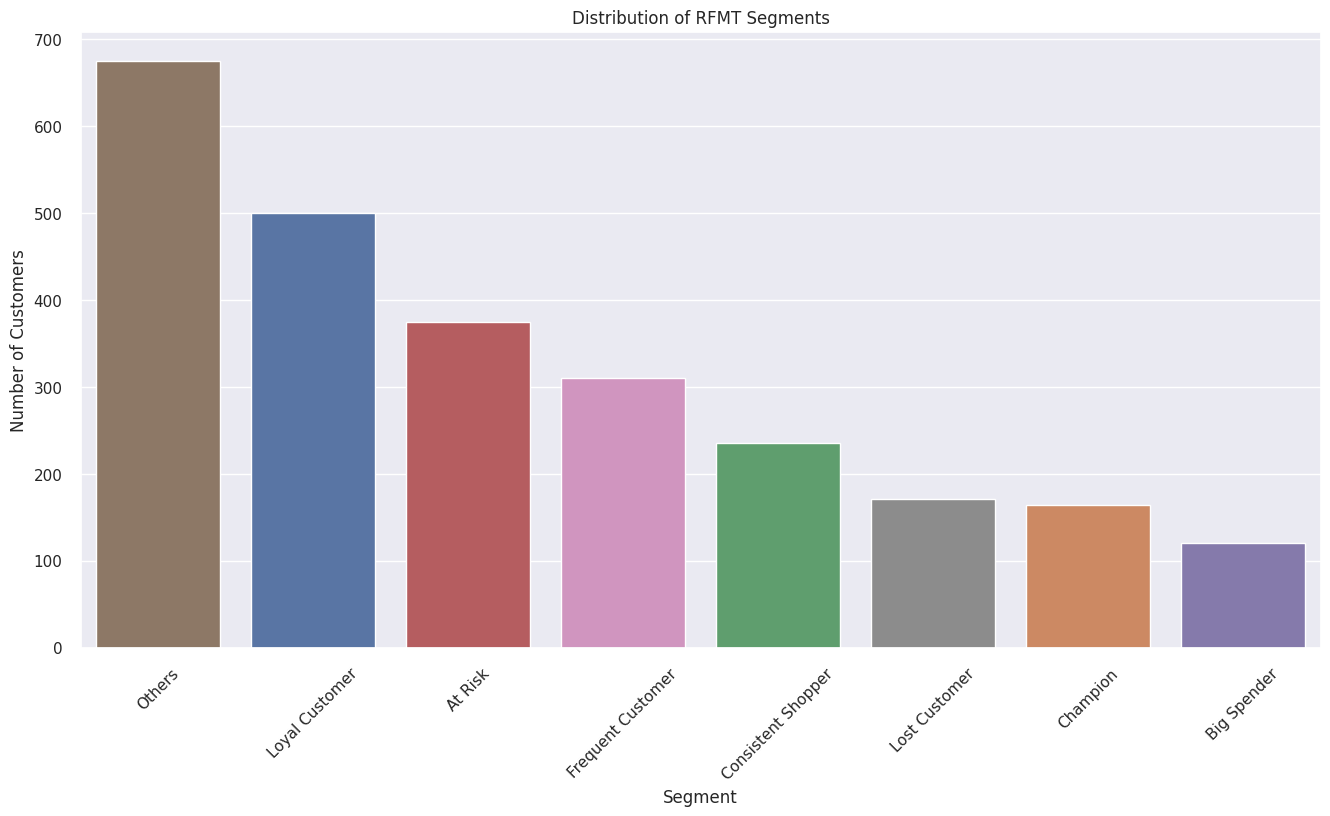

In [ ]:
# Visualize the Segment Distribution
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, hue='Segment')
plt.title('Distribution of RFMT Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

**Interpretation:**
- **Champions:** These are the most valuable customers, with high purchase frequency, high spending, and short interpurchase times.
- **Loyal Customers:** These customers have purchased recently and frequently, making them prime candidates for loyalty programs.
- **Frequent Customers:** These customers purchase often but may not spend as much per transaction as Big Spenders.
- **Big Spenders:** These customers have high monetary value but may not purchase as frequently.
- **Consistent Shoppers:** These customers purchase regularly but with lower frequency and monetary value.
- **Lost Customers:** These customers haven't purchased recently, have low spending, and are at risk of being lost permanently.
- **At Risk:** These customers have not purchased recently and are in danger of being lost if not re-engaged.

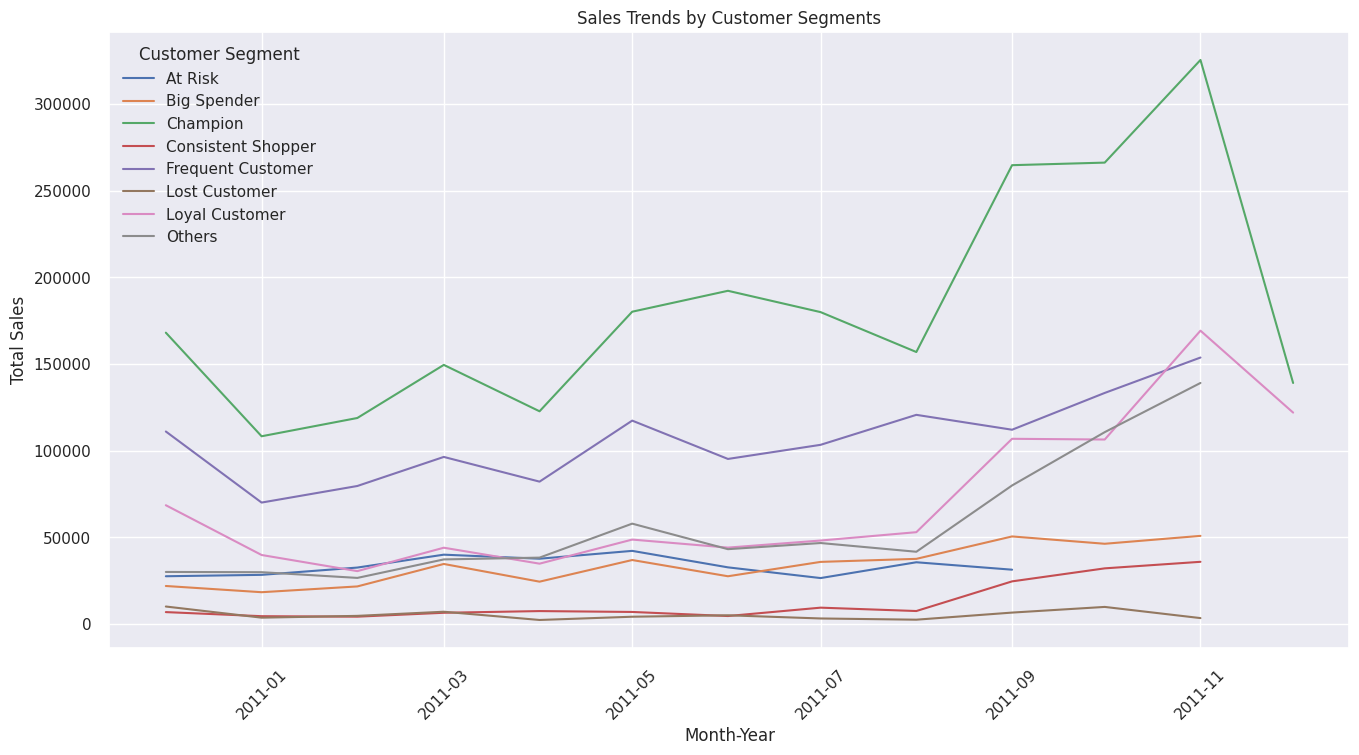

In [ ]:
# Group by MonthYear and Segment, then calculate total sales
segment_sales_trends = pd.merge(filtered_data, rfm[['CustomerID', 'Segment']], on='CustomerID')
segment_sales_trends = segment_sales_trends.groupby(['MonthYear', 'Segment'])['TotalSales'].sum().reset_index()

# Convert the MonthYear column to a datetime object
segment_sales_trends['MonthYear'] = segment_sales_trends['MonthYear'].dt.to_timestamp()

# Plot sales trends by customer segments
plt.figure(figsize=(16, 8))
sns.lineplot(data=segment_sales_trends, x='MonthYear', y='TotalSales', hue='Segment')
plt.title('Sales Trends by Customer Segments')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.xlabel('Month-Year')
plt.legend(title='Customer Segment')
plt.show()

**Key Insights:**
- Champions: This segment consistently contributes the most to total sales across all months, peaking significantly during September and November 2011.
- Frequent Customers: This segment also shows a steady contribution, particularly in September and November 2011.
- Loyal Customers: Although smaller than the Champions and Frequent Customers segments, this group shows a consistent and notable contribution to sales, with peaks similar to those of the Champions.
- Big Spenders: Despite a lower frequency of purchases, this segment's contribution is significant and consistent over time.
- Others: This segment includes various customers who do not fit neatly into other categories but still make substantial contributions to sales, particularly in November 2011.
- At Risk and Lost Customers: These segments show declining contributions, highlighting areas where re-engagement strategies could be beneficial.
- Consistent Shoppers: Although this segment has a lower sales volume, it demonstrates steady behavior, indicating opportunities for upselling or cross-selling.

## Modeling with K-Means Clustering

We will use the K-Means clustering analysis to find the distinct customer segments based on their Recency, Frequency, Monetary value (RFM), and Interpurchase Time (T).

In [ ]:
X = rfm[['Recency', 'Frequency', 'Monetary', 'InterpurchaseTime']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

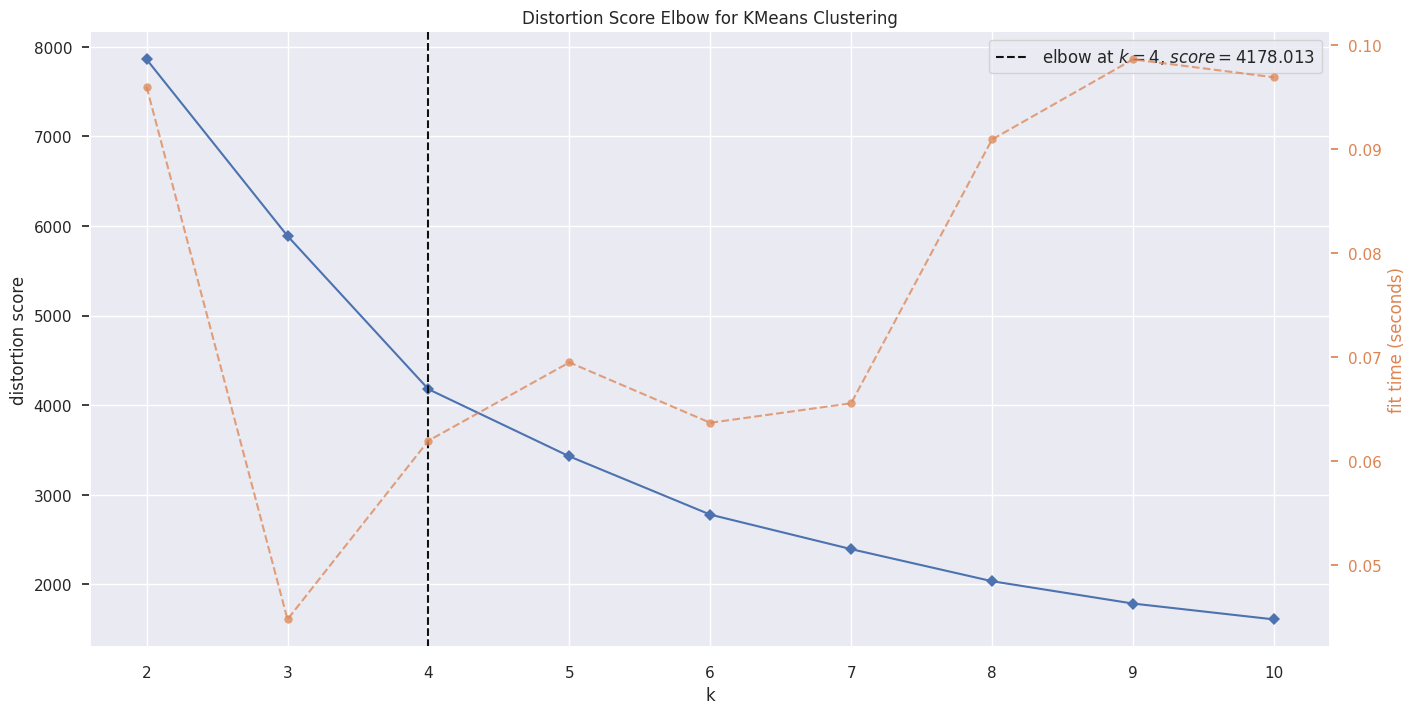

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method using Yellowbrick
# Initialize the KMeans model
model = KMeans(random_state=42, init='k-means++', max_iter = 1000)

# Use the KElbowVisualizer to find the optimal number of clusters
elbow_visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion')
elbow_visualizer.fit(X_scaled)
elbow_visualizer.show()

The optimal clusters using the elbow method are found to be 4.

In [ ]:
# Fit the K-Means Model with the optimal number of clusters
optimal_clusters = elbow_visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, init = 'k-means++', max_iter = 1000)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Summary of clusters
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'InterpurchaseTime': 'mean',
    'CustomerID': 'count'
}).reset_index()

# Display the Cluster Summary
print("Cluster Summary:")
cluster_summary

Cluster Summary:


Cluster     Recency  Frequency      Monetary  InterpurchaseTime  CustomerID
0        0  192.035545   3.011848    859.449836          56.834107         422
1        1   28.642610   6.708430   2448.247656          49.791618        1732
2        2    6.125000  60.333333  55093.076667           8.112534          24
3        3   49.764706   2.262032    729.766340         202.787433         374

The K-Means clustering analysis resulted in four distinct customer segments based on their Recency, Frequency, Monetary value (RFM), and Interpurchase Time (T). Here is a summary of each cluster:

**Cluster 0:**

- Recency: 192 days (high recency, indicating that customers in this cluster have not made a purchase in a long time).
- Frequency: 3 transactions on average.
- Monetary: £859.45 (moderate spending).
- Interpurchase Time: 57 days between purchases (on average).
- CustomerID Count: 422 customers.
- Interpretation: This cluster likely represents inactive or at-risk customers who have made a few purchases but have not returned recently. They may require re-engagement strategies.

**Cluster 1:**

- Recency: 29 days (moderately recent purchases).
- Frequency: 7 transactions on average.
- Monetary: £2,448.25 (significant spending).
- Interpurchase Time: 50 days between purchases.
- CustomerID Count: 1,732 customers.
- Interpretation: These customers are loyal and regular shoppers. They have moderate recency and spend significantly, indicating consistent engagement with the business.

**Cluster 2:**

- Recency: 6 days (very recent purchases).
- Frequency: 60 transactions on average.
- Monetary: £55,093.08 (extremely high spending).
- Interpurchase Time: 8 days between purchases.
- CustomerID Count: 24 customers.
- Interpretation: This is a small group of high-value, highly engaged customers (VIPs) who make frequent and substantial purchases. They represent a key segment that should be nurtured.

**Cluster 3:**

- Recency: 50 days (moderately recent).
- Frequency: 2 transactions on average.
- Monetary: £729.77 (low spending).
- Interpurchase Time: 203 days between purchases.
- CustomerID Count: 374 customers.
- Interpretation: This cluster consists of occasional shoppers who engage with the business infrequently and spend relatively little. They may require targeted campaigns to increase engagement.

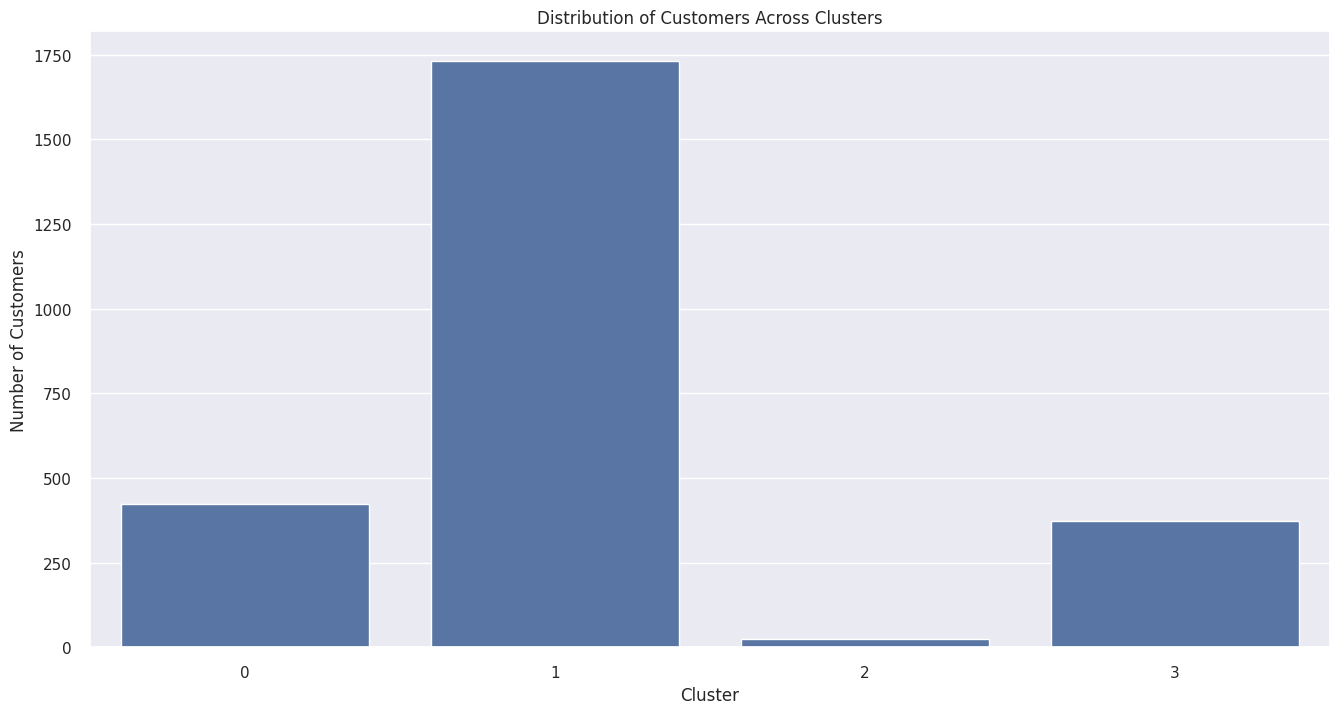

In [ ]:
# Visualize cluster size
sns.countplot(data=rfm, x='Cluster')
plt.title('Distribution of Customers Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

**Key Takeaways:**
The clustering analysis has revealed distinct customer segments, each with unique purchasing behaviors and engagement levels.
- The VIP customers (Cluster 2) are critical to the business's revenue, and maintaining their satisfaction should be a top priority.
- The at-risk customers (Cluster 0) and occasional shoppers (Cluster 3) may benefit from re-engagement strategies, such as personalized marketing or loyalty programs.
- The loyal and regular customers (Cluster 1) present an opportunity to strengthen relationships through targeted promotions and value-added services.

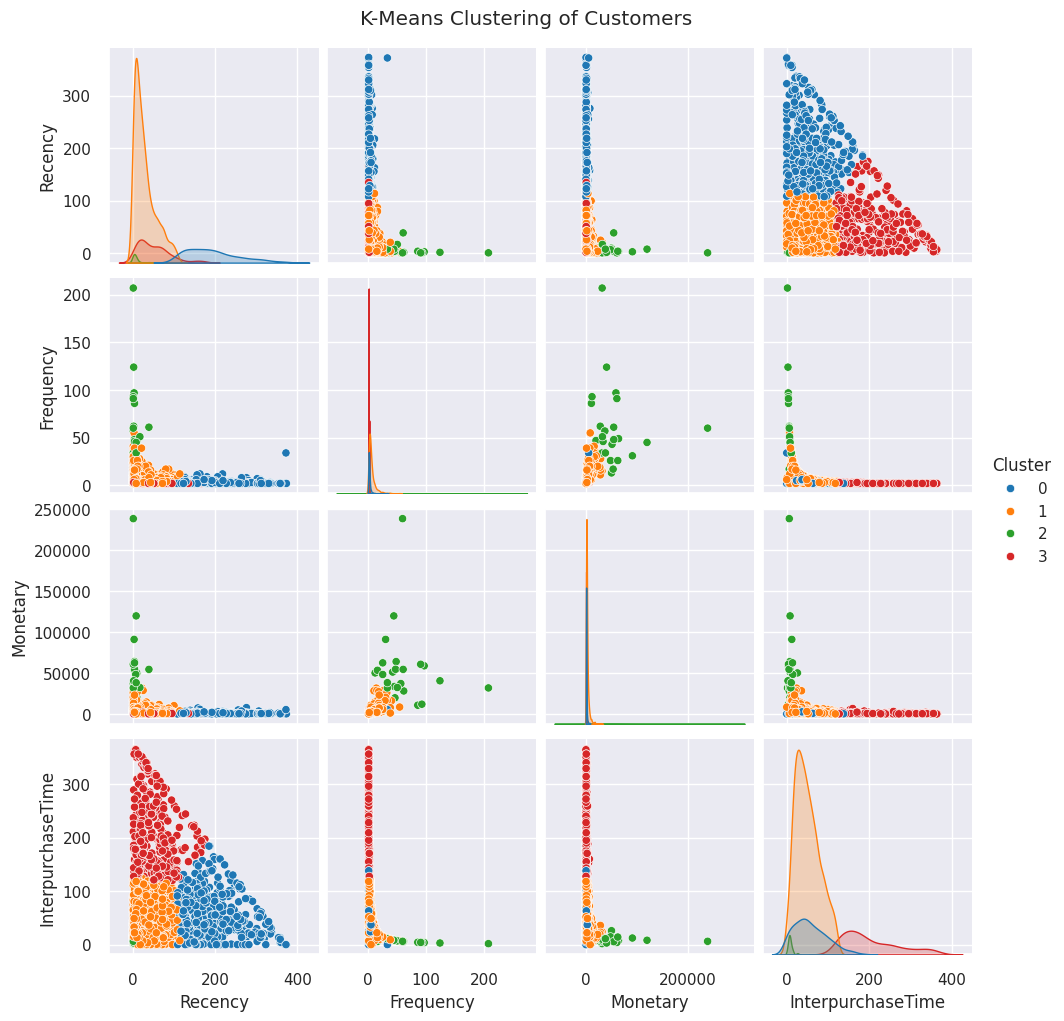

In [ ]:
# Pairplot to visualize clusters
sns.pairplot(rfm, hue='Cluster', palette='tab10')
plt.suptitle('K-Means Clustering of Customers', y=1.02)
plt.show()

In [ ]:
# Inertia (WCSS)
print(f"Inertia (WCSS): {kmeans.inertia_}")

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, rfm['Cluster'], metric='euclidean')
print(f"Silhouette Score: {silhouette_avg}")

Inertia (WCSS): 4178.01810221252
Silhouette Score: 0.479233417229219


**Evaluation Metrics:**

- Inertia (WCSS): 4178.02, indicating the sum of squared distances between samples and their closest cluster center. Lower inertia typically means better-defined clusters.
- Silhouette Score: 0.4792, which measures the quality of the clustering. A score close to 1 indicates well-separated clusters, while a score near 0 indicates overlapping clusters. The score suggests moderately good clustering with some overlap.

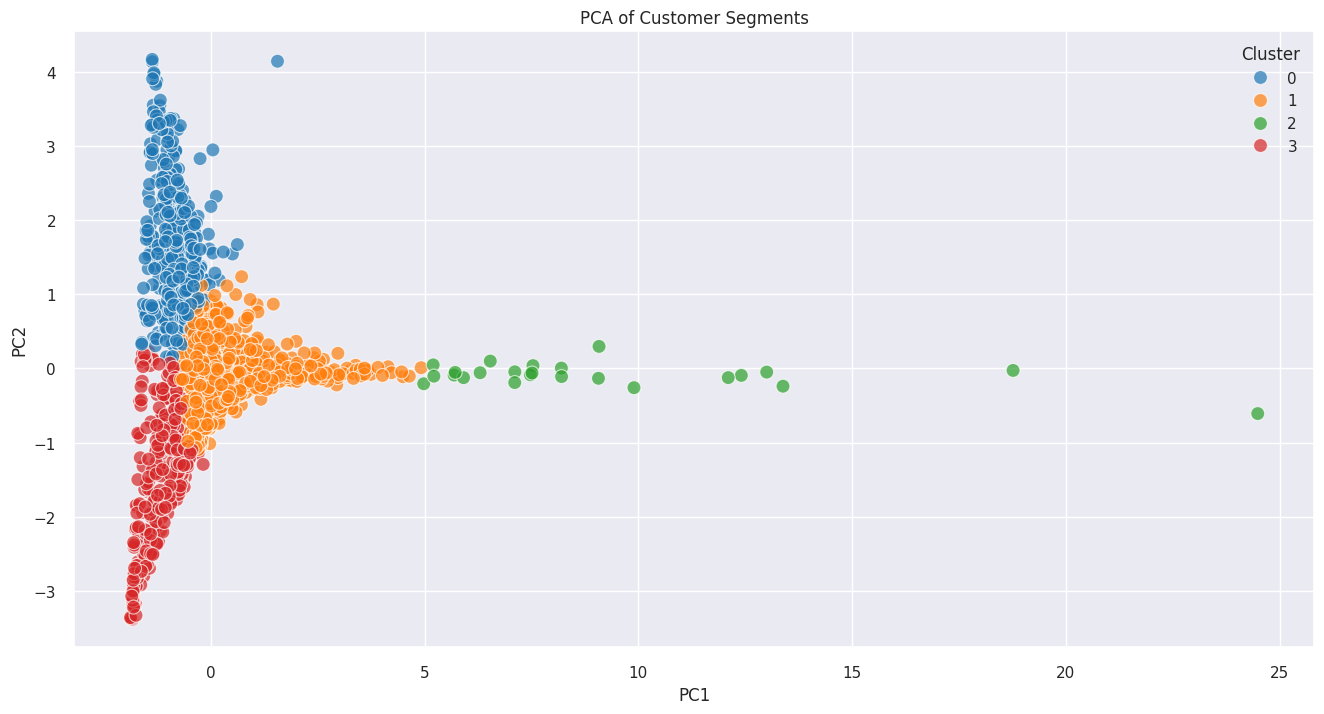

In [ ]:
# Visualize Clusters using PCA
# Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = rfm['Cluster']

# Plot the PCA results
plt.figure(figsize=(16, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='tab10', s=100, alpha=0.7)
plt.title('PCA of Customer Segments')
plt.show()

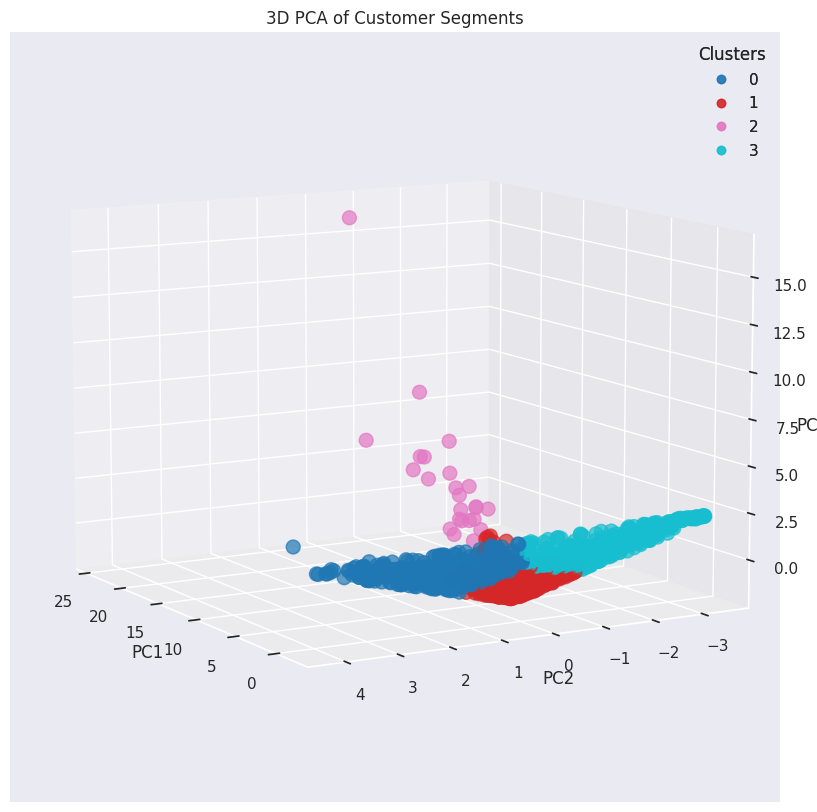

In [ ]:
# Reduce dimensions to 3D using PCA for visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create a DataFrame for the 3D PCA results
pca_df_3d = pd.DataFrame(data=X_pca_3d, columns=['PC1', 'PC2', 'PC3'])
pca_df_3d['Cluster'] = rfm['Cluster']

# Plot the 3D PCA results
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(pca_df_3d['PC1'], pca_df_3d['PC2'], pca_df_3d['PC3'],
                     c=pca_df_3d['Cluster'], cmap='tab10', s=100, alpha=0.7)

# Labels and title
ax.set_title('3D PCA of Customer Segments')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Adding a color bar
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Adjusting the viewing angle
ax.view_init(elev=10, azim=150)
plt.show()

## Market Basket Analysis

Market Basket Analysis is a data mining technique used to uncover relationships between items in a large dataset of transactions. In this case, the Apriori algorithm is applied to identify frequently co-occurring items (itemsets) in customer transactions.

In [ ]:
# Group the data by InvoiceNo and Description to create a list of transactions
basket_data = filtered_data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

# Convert quantities to boolean values (True or False) for the presence or absence of an item in the transaction
basket_data = basket_data.applymap(lambda x: x > 0)

In [ ]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(basket_data, min_support=0.01, use_colnames=True)

In [ ]:
frequent_itemsets

support                                           itemsets
0    0.010645                 ( SET 2 TEA TOWELS I LOVE LONDON )
1    0.012097                           (10 COLOUR SPACEBOY PEN)
2    0.010706                  (12 MESSAGE CARDS WITH ENVELOPES)
3    0.015061                    (12 PENCIL SMALL TUBE WOODLAND)
4    0.017238              (12 PENCILS SMALL TUBE RED RETROSPOT)
..        ...                                                ...
979  0.010766  (WOODEN FRAME ANTIQUE WHITE , WOODEN PICTURE F...
980  0.010282  (WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...
981  0.012218  (GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE...
982  0.011190  (LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,...
983  0.010041  (LUNCH BAG RED RETROSPOT, LUNCH BAG  BLACK SKU...

[984 rows x 2 columns]

- The itemsets reveal products that customers often purchase together. For example, the combination of "LUNCH BAG RED RETROSPOT" and "LUNCH BAG CARS BLUE" has a support of 0.0112, indicating that these two products are purchased together in about 1.12% of transactions.

- Support is the proportion of transactions in which an itemset appears. Higher support values indicate more commonly occurring itemsets, suggesting strong associations between products.

In [ ]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Analyze the rules
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])

# Display the top 10 rules
print("Top 10 association rules:")
rules.head(10)

Top 10 association rules:


antecedents  \
154                                (HERB MARKER THYME)   
155                             (HERB MARKER ROSEMARY)   
153                              (HERB MARKER PARSLEY)   
962  (WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...   
152                             (HERB MARKER ROSEMARY)   
151                             (HERB MARKER ROSEMARY)   
150                                 (HERB MARKER MINT)   
971  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
628  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   
969  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   

                              consequents  antecedent support  \
154                (HERB MARKER ROSEMARY)            0.010827   
155                   (HERB MARKER THYME)            0.010948   
153                (HERB MARKER ROSEMARY)            0.010766   
962  (WOODEN STAR CHRISTMAS SCANDINAVIAN)            0.011069   
152                 (HERB MARKER PARSLEY)            0.010948   
151                    (HERB MARKER MINT)            0.010948   
150                (HERB MARKER ROSEMARY)            0.011129   
971     (GREEN REGENCY TEACUP AND SAUCER)            0.013609   
628     (GREEN REGENCY TEACUP AND SAUCER)            0.023105   
969    (ROSES REGENCY TEACUP AND SAUCER )            0.013912   

     consequent support   support  confidence       lift  leverage  \
154            0.010948  0.010222    0.944134  86.239606  0.010103   
155            0.010827  0.010222    0.933702  86.239606  0.010103   
153            0.010948  0.010041    0.932584  85.184617  0.009923   
962            0.024255  0.010282    0.928962  38.300560  0.010014   
152            0.010766  0.010041    0.917127  85.184617  0.009923   
151            0.011129  0.010041    0.917127  82.406858  0.009919   
150            0.010948  0.010041    0.902174  82.406858  0.009919   
971            0.037017  0.012218    0.897778  24.253203  0.011714   
628            0.037017  0.020565    0.890052  24.044503  0.019710   
969            0.040948  0.012218    0.878261  21.447987  0.011648   

     conviction  zhangs_metric  
154   17.704034       0.999223  
155   14.920029       0.999345  
153   14.670941       0.999017  
962   13.735494       0.984791  
152   11.936753       0.999200  
151   11.932374       0.998800  
150   10.110311       0.998983  
971    9.420487       0.971996  
628    8.758561       0.981079  
969    7.877924       0.966826

- Rules help uncover relationships between products that are frequently purchased together, offering valuable insights for cross-selling and product bundling strategies.

- The association_rules function was used to generate rules from the frequent itemsets. The rules were evaluated based on the lift metric, which measures the strength of an association relative to the products’ individual occurrence rates.

- The generated rules were sorted by confidence and lift in descending order to identify the strongest and most reliable associations.

**High Confidence & Lift Values:**

- The highest confidence (94.41%) and lift (86.24) were found between "HERB MARKER THYME" and "HERB MARKER ROSEMARY," indicating that these items are very strongly associated with each other.
- The high lift values (e.g., 86.24 for the herb markers) suggest that customers who purchase one of these items are highly likely to purchase the other as well. This insight could be leveraged to create product bundles or targeted promotions.

**Conviction & Zhang’s Metric:**

- Conviction and Zhang’s Metric further validate the strength of these associations, with values close to 1 for many of the top rules, indicating robust and reliable relationships between the products.

**Conclusion:** The association rules identified in this analysis highlight strong product pairings and suggest opportunities for cross-selling strategies. For instance, the herb markers could be bundled together or promoted as a set to maximize sales, while similar strategies could be applied to other product combinations identified in the analysis.

In [ ]:
# Identify the top 10 products by frequency in the antecedents
top_antecedents = rules['antecedents'].value_counts().nlargest(10).index
top_consequents = rules['consequents'].value_counts().nlargest(10).index

# Filter the rules to include only those with top 10 antecedents or consequents
filtered_rules = rules[(rules['antecedents'].isin(top_antecedents)) & (rules['consequents'].isin(top_consequents))]

# Alternatively, you could filter by top 10 rules with highest lift or confidence
top_rules = rules.nlargest(10, 'lift')  # You can change 'lift' to 'confidence' or other metrics

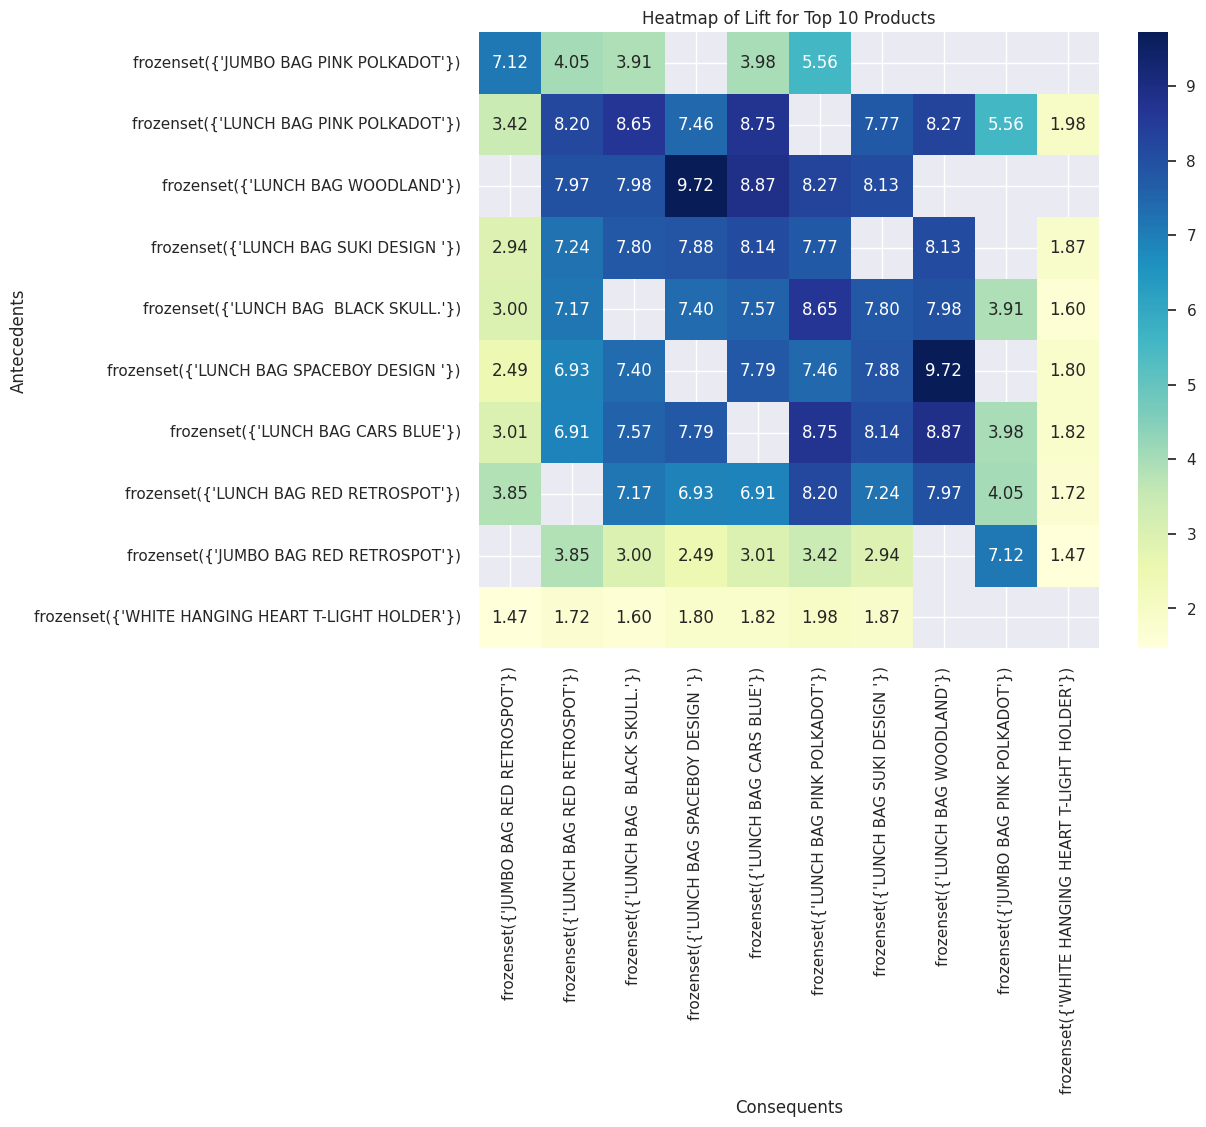

In [ ]:
# Create a heatmap for lift using filtered rules
heatmap_data_filtered = filtered_rules.pivot_table(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_filtered, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap of Lift for Top 10 Products')
plt.ylabel('Antecedents')
plt.xlabel('Consequents')
plt.show()

The heatmap shows lift values for the associations between the top 10 products:

- High Lift Values:

Associations with high lift values (e.g., between "LUNCH BAG PINK POLKADOT" and "LUNCH BAG CARS BLUE" with a lift of 8.75) indicate a strong relationship, meaning that customers who buy one of these items are very likely to buy the other.
Products that frequently appear together and have high lift values can be excellent candidates for cross-selling and promotional bundling.

- Lower Lift Values:

Lower lift values (e.g., between "JUMBO BAG PINK POLKADOT" and "LUNCH BAG RED RETROSPOT" with a lift of 4.05) suggest weaker associations. These relationships might be less critical for cross-selling strategies but still provide insights into customer purchasing patterns.

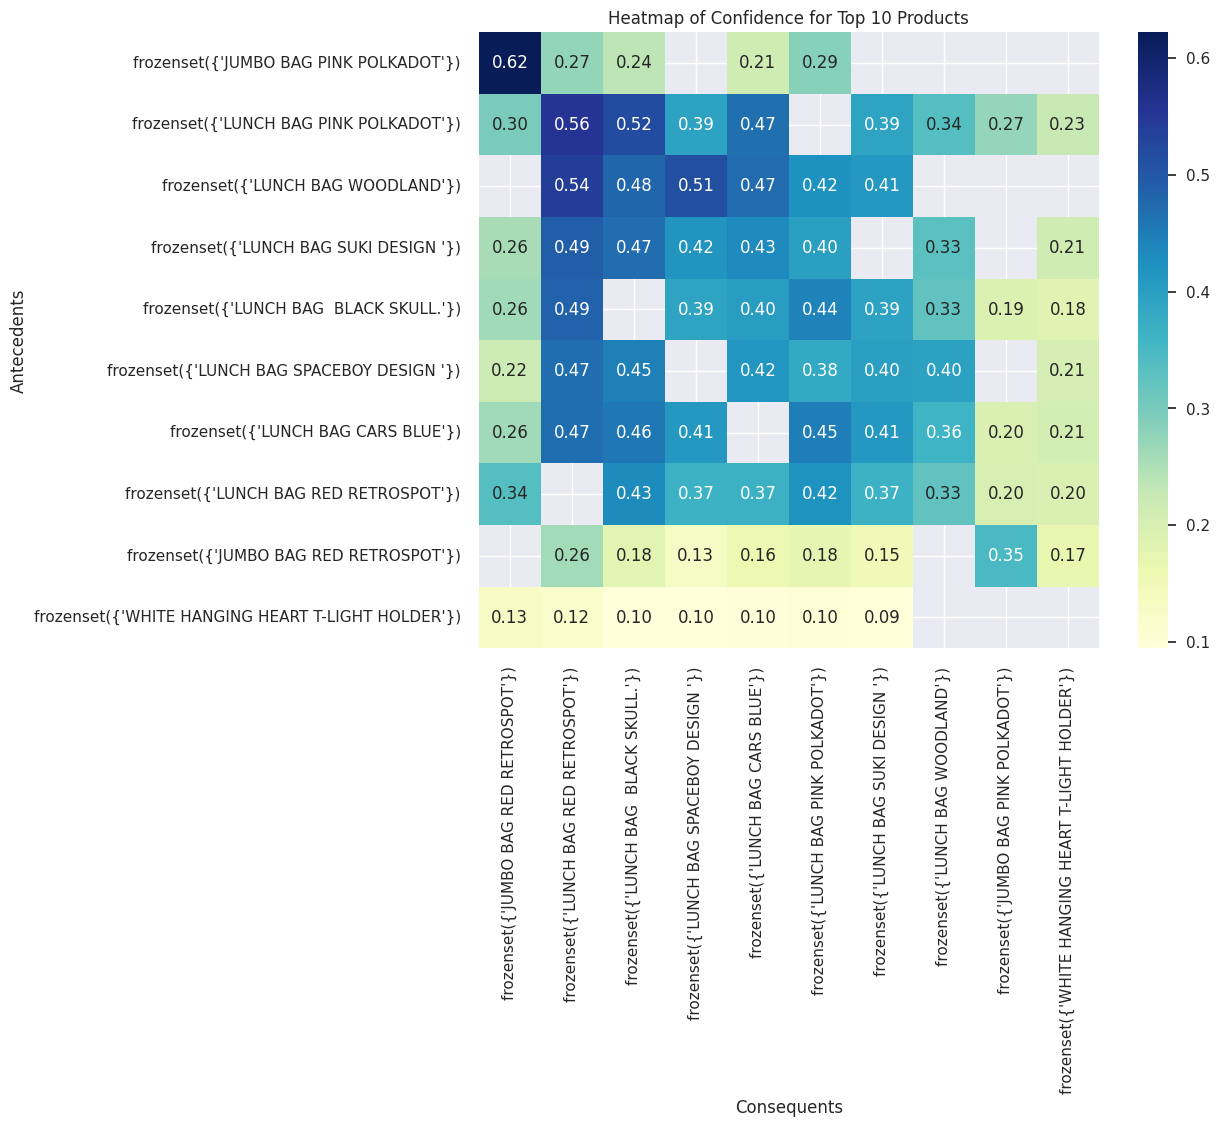

In [ ]:
# Create a heatmap for confidence using filtered rules
heatmap_data_filtered_conf = filtered_rules.pivot_table(index='antecedents', columns='consequents', values='confidence')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_filtered_conf, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap of Confidence for Top 10 Products')
plt.ylabel('Antecedents')
plt.xlabel('Consequents')
plt.show()

The heatmap shows confidence values for the associations between the top 10 products:

- High Confidence Values:

High confidence values (e.g., "LUNCH BAG PINK POLKADOT" and "LUNCH BAG CARS BLUE" with a confidence of 0.47) suggest that customers who purchase "LUNCH BAG PINK POLKADOT" are highly likely to also purchase "LUNCH BAG CARS BLUE."
These pairs are crucial for targeted promotions and cross-selling strategies.

- Lower Confidence Values:

Lower confidence values (e.g., "JUMBO BAG RED RETROSPOT" and "LUNCH BAG SPACEBOY DESIGN" with a confidence of 0.13) suggest weaker associations. These pairs may be less effective for joint promotions.

**Conclusion:** The confidence heatmap complements the lift heatmap by providing another perspective on the strength of associations between products. High confidence values highlight products that are frequently purchased together, providing actionable insights for marketing strategies, such as bundling products or designing targeted promotions to increase sales.

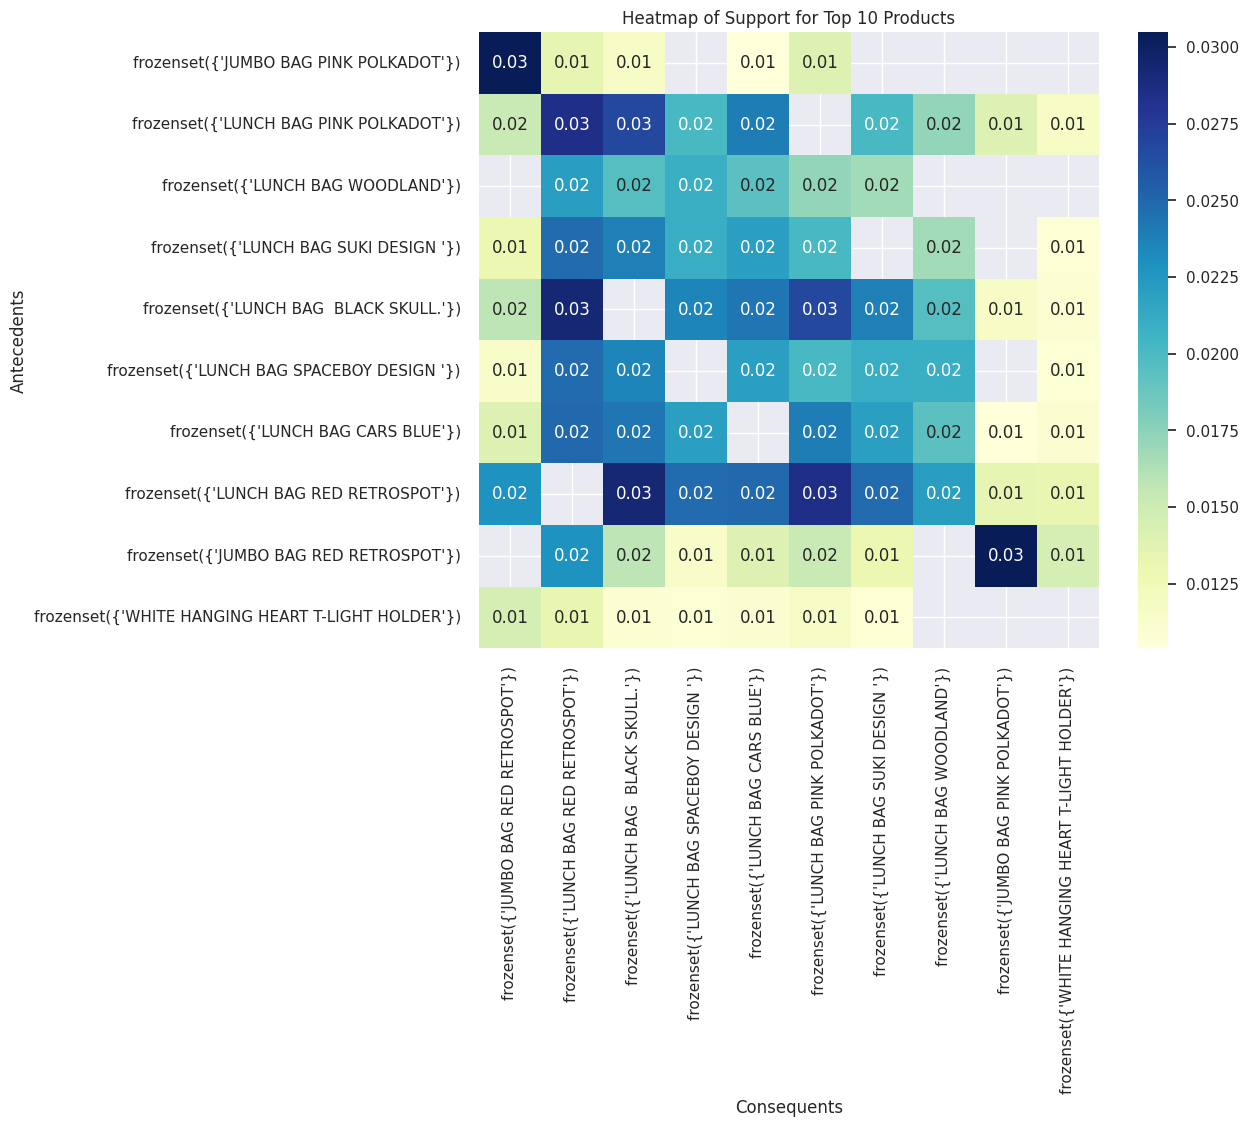

In [ ]:
# Create a heatmap for support using filtered rules
heatmap_data_filtered_sup = filtered_rules.pivot_table(index='antecedents', columns='consequents', values='support')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_filtered_sup, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap of Support for Top 10 Products')
plt.ylabel('Antecedents')
plt.xlabel('Consequents')
plt.show()

The heatmap provides insights into the frequency of co-purchases between different products:

- High Support Values:

Pairs like "LUNCH BAG RED RETROSPOT" and "LUNCH BAG BLACK SKULL" show higher support values (e.g., 0.03), indicating they often appear together in transactions.
Such pairs represent strong associations and are crucial for designing promotional bundles.

- Lower Support Values:

Pairs with lower support (e.g., "JUMBO BAG RED RETROSPOT" and "LUNCH BAG SUKI DESIGN" with a support of 0.01) indicate less frequent co-purchases, suggesting these combinations are less common.

**Conclusion:** The support heatmap helps in identifying product combinations that are frequently bought together. High-support pairs can be targeted for upselling and cross-selling strategies, while low-support pairs might be explored further to understand if they could be promoted together to increase sales. The combination of support, confidence, and lift metrics provides a comprehensive view of product relationships and can guide marketing and inventory decisions.

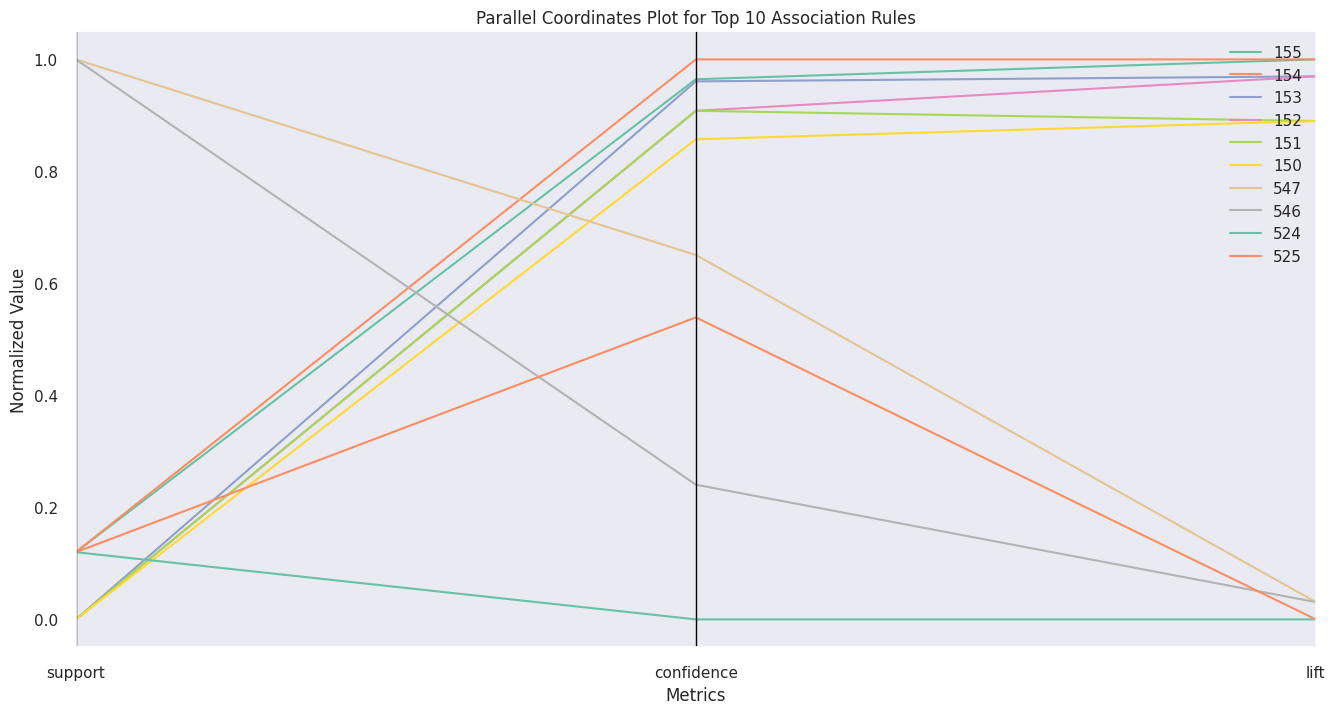

In [ ]:
# Prepare the data for parallel coordinates plot using top rules
parallel_data_filtered = top_rules[['support', 'confidence', 'lift']].copy()
parallel_data_filtered['rule'] = top_rules.index

# Normalize the metrics for better visualization
parallel_data_filtered[['support', 'confidence', 'lift']] = parallel_data_filtered[['support', 'confidence', 'lift']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plotting parallel coordinates
parallel_coordinates(parallel_data_filtered, class_column='rule', color=plt.cm.Set2.colors)
plt.title('Parallel Coordinates Plot for Top 10 Association Rules')
plt.xlabel('Metrics')
plt.ylabel('Normalized Value')
plt.show()

The goal of the parallel coordinates plot is to visualize and compare the top 10 association rules based on their support, confidence, and lift metrics.

- Lines Closer to 1:

Lines that stay closer to 1 across all three metrics indicate rules with high support, confidence, and lift, making them very strong association rules.

- Diverging Lines:

If a line diverges across the metrics, it suggests that the rule is strong in some metrics but weaker in others. For example, a rule might have high lift but lower support and confidence.

- Overall Trends:

This plot allows for a quick assessment of how different rules compare across these three key metrics, helping prioritize which rules to focus on for marketing or product placement strategies.

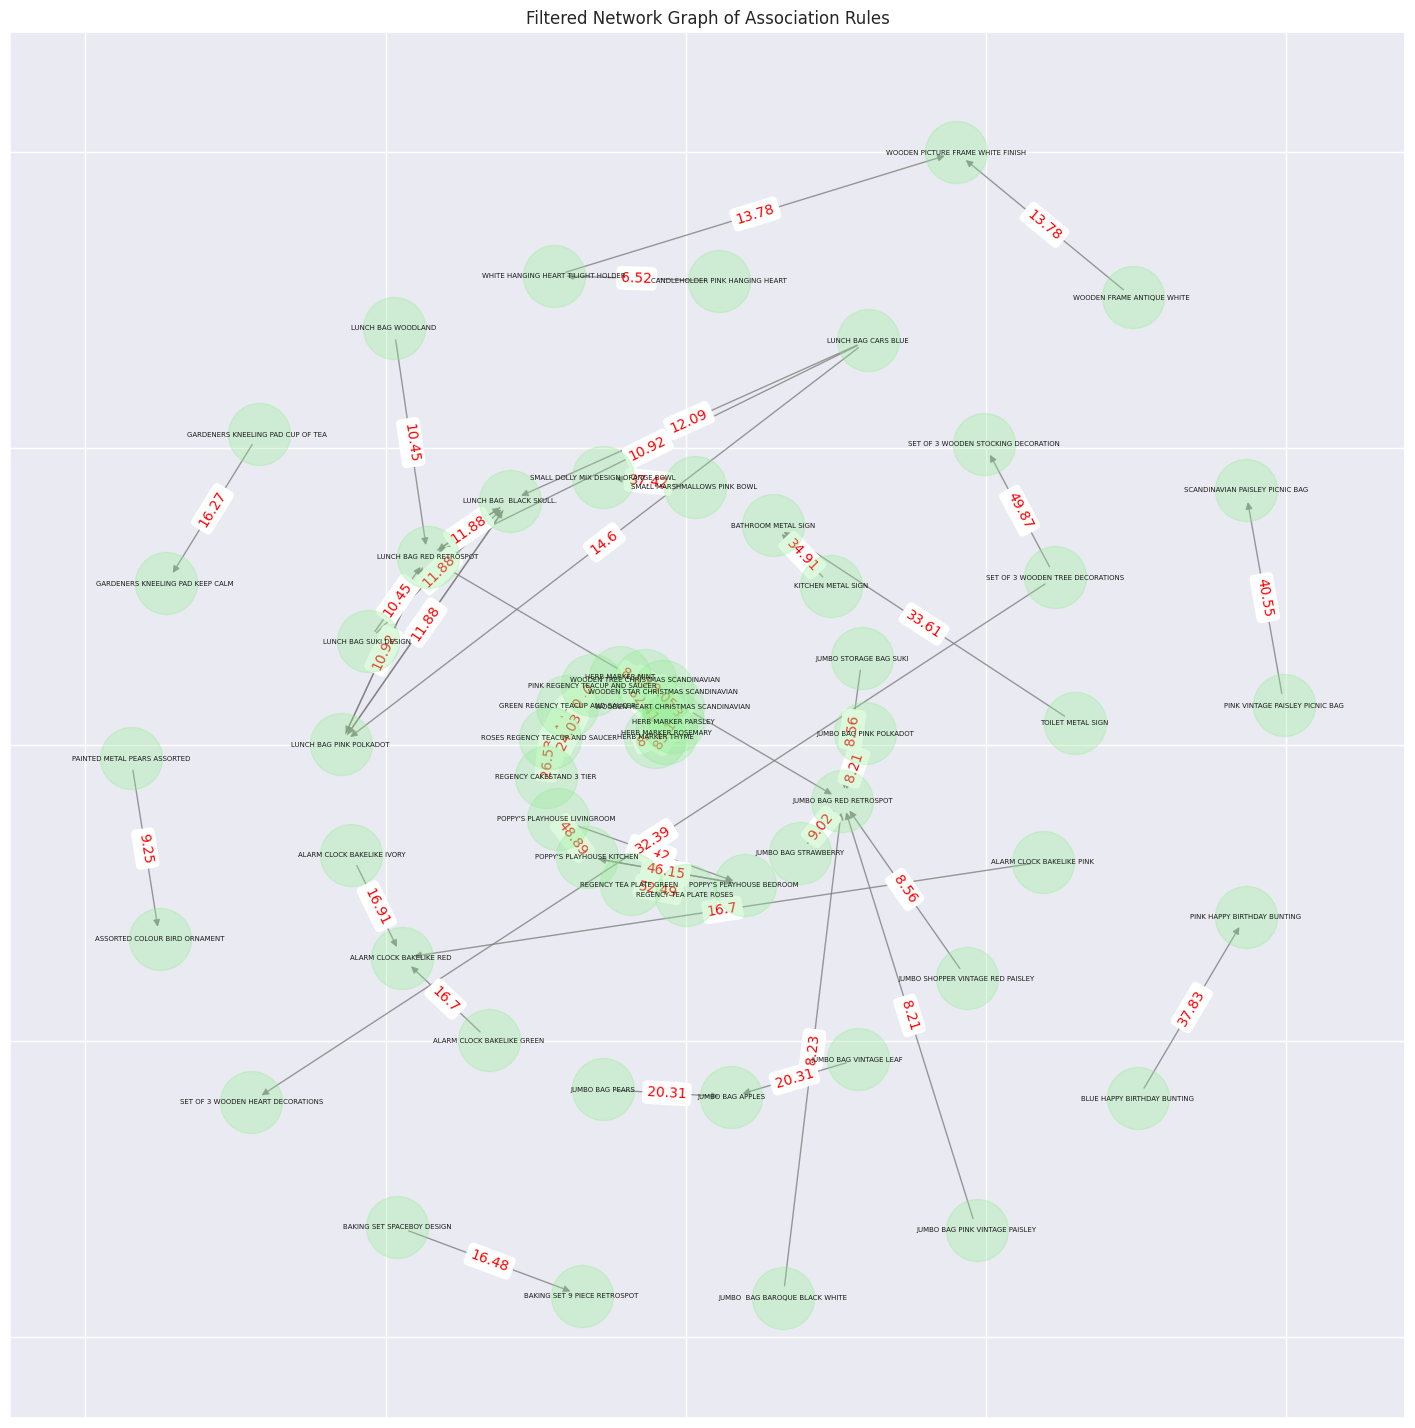

In [ ]:
# Filter rules to include only those with high lift and confidence
filtered_rules = rules[(rules['lift'] > 2) & (rules['confidence'] > 0.7)]

# Create the directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
for _, rule in filtered_rules.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G.add_node(antecedent)
            G.add_node(consequent)
            G.add_edge(antecedent, consequent, weight=rule['lift'])

# Adjust layout
pos = nx.spiral_layout(G)

# Draw the graph with adjustments
plt.figure(figsize=(18, 18))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightgreen', alpha=0.3)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), edge_color='gray', alpha=0.8, arrows=True)
nx.draw_networkx_labels(G, pos, font_size=5, font_family='sans-serif')

# Display edge labels (lift values)
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('Filtered Network Graph of Association Rules')
plt.show()

We used Network Graph, to visualize the relationships between products based on association rules with high lift and confidence values, using a directed network graph.
- The association rules were filtered to include only those with a lift greater than 2 and a confidence greater than 0.7. This ensures that the graph focuses on the strongest relationships between products.
- Node Sizes: Nodes with more connections (i.e., involved in multiple rules) may represent key products that are central to many transactions.
- Edge Weights: The thickness of the edges is proportional to the lift value, highlighting the strength of the associations.
- Network Clusters: Clusters of tightly connected nodes can indicate groups of products frequently bought together, which can be used for cross-selling strategies.

**Conclusion:** The network graph provides a clear visualization of the strongest associations between products, helping identify key items that can drive bundled promotions or product recommendations. By focusing on rules with high lift and confidence, the graph highlights the most impactful relationships, offering actionable insights for optimizing product placement and marketing strategies.

# Insights and Recommendations

Based on the extensive data analysis and modeling performed throughout the project, several key insights and actionable recommendations have been identified. These insights can significantly inform marketing strategies, product placement, and inventory management to enhance business performance.

**1. Customer Segmentation Insights**

---


- Customer Segments: The RFM-T segmentation identified several key customer segments such as Champions, Loyal Customers, Frequent Customers, and At-Risk Customers.
- Key Insight: Champions and Frequent Customers contribute significantly to overall revenue, while At-Risk and Lost Customers show a higher likelihood of churn.

**Recommendations:**

- Targeted Retention Campaigns: Develop personalized marketing campaigns focused on retaining At-Risk and Lost Customers. Offer incentives like discounts or exclusive offers to re-engage them.
- Loyalty Programs: Strengthen loyalty programs for Champions and Frequent Customers by offering rewards, early access to sales, or special promotions. This can reinforce their brand loyalty and increase their lifetime value.

**2. Sales and Revenue Trends**

---


- Sales Peaks: The analysis highlighted sales peaks during specific months, particularly leading up to December, which saw a significant drop in the last month.
- Key Insight: The sharp increase in sales during the pre-holiday period suggests strong seasonal demand, while the subsequent drop indicates a post-holiday slowdown.

**Recommendations:**

- Seasonal Inventory Management: Ensure sufficient stock levels for high-demand products during peak months, especially before December. Implement inventory management strategies to avoid stockouts or excess inventory.
- Post-Holiday Promotions: To mitigate the December sales drop, consider launching post-holiday promotions targeting customers who made purchases earlier. Encourage repeat purchases through targeted discounts or bundled offers.

**3. Top Products and Product Categories**

---


- Best-Selling Products: The analysis identified top-selling products, such as "JUMBO BAG RED RETROSPOT" and "WHITE HANGING HEART T-LIGHT HOLDER," that consistently generate high sales.
- Key Insight: These products are consistently popular and often purchased in conjunction with other items.

**Recommendations:**

- Product Bundling: Implement bundling strategies that pair these top-selling products with complementary items. For example, bundling the "JUMBO BAG RED RETROSPOT" with other decorative items could increase average order value.
- Prominent Placement: Ensure these top products are prominently displayed on the website and during seasonal sales. Highlight them in marketing campaigns to drive additional sales.

**4. Association Rules and Market Basket Analysis**

---


- Product Associations: The association rules revealed strong relationships between certain products, such as "HERB MARKER THYME" and "HERB MARKER ROSEMARY," indicating they are frequently purchased together.
- Key Insight: Leveraging these associations can drive cross-selling opportunities.

**Recommendations:**

- Cross-Selling Opportunities: Implement cross-selling strategies by suggesting associated products at checkout or on product pages. For instance, when a customer adds a "HERB MARKER ROSEMARY" to their cart, recommend "HERB MARKER THYME" as a complementary purchase.
- Personalized Recommendations: Use these insights to enhance product recommendation engines, delivering more personalized suggestions to customers based on their purchase history and product associations.

**5. Customer Behavior Insights**

---


- Purchase Timing: The analysis showed that most purchases occur during specific hours of the day, with peaks around midday and early afternoon.
- Key Insight: Understanding customer purchasing behavior can optimize the timing of marketing efforts.

**Recommendations:**

- Time-Based Promotions: Schedule email campaigns and flash sales to align with peak purchasing hours, maximizing customer engagement and conversion rates.
- Dynamic Pricing Strategies: Explore dynamic pricing during peak shopping times to maximize revenue, offering discounts during off-peak hours to stimulate demand.

## Conclusion
The insights derived from this comprehensive analysis provide a robust foundation for informed decision-making. By leveraging customer segmentation, sales trends, product associations, and purchase behavior, the business can enhance customer engagement, optimize inventory, and increase revenue. Implementing these recommendations will lead to more effective marketing strategies, improved product placement, and efficient inventory management, ultimately driving sustainable growth.